## **GSR**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

gsr=pd.read_csv('34_GSR.csv')
gsr.head()

UnixTime  Row QuestionKey                   Timestamp  SampleNumber  \
0  1.677067e+09    1         NaN  2023-02-22 17:24:02.031996           NaN   
1  1.677067e+09    2         NaN  2023-02-22 17:24:02.034250       13405.0   
2  1.677067e+09    3         NaN  2023-02-22 17:24:02.042063       13406.0   
3  1.677067e+09    4         NaN  2023-02-22 17:24:02.049875       13407.0   
4  1.677067e+09    5         NaN  2023-02-22 17:24:02.057688       13408.0   

   Timestamp RAW  Timestamp CAL  System Timestamp CAL  VSenseBatt RAW  \
0            NaN            NaN                   NaN             NaN   
1      5307975.0    104726.5625          1.677067e+12          2538.0   
2      5308231.0    104734.3750          1.677067e+12          2557.0   
3      5308487.0    104742.1875          1.677067e+12          2556.0   
4      5308743.0    104750.0000          1.677067e+12          2565.0   

   VSenseBatt CAL  GSR RAW  GSR Resistance CAL  GSR Conductance CAL  \
0             NaN      NaN                 NaN                  NaN   
1     3696.369231  35408.0          348.659004             2.868132   
2     3724.041026  35408.0          348.659004             2.868132   
3     3722.584615  35409.0          348.480980             2.869597   
4     3735.692308  35407.0          348.837209             2.866667   

   Packet reception rate RAW  
0                        NaN  
1                       85.0  
2                       85.0  
3                       85.0  
4                       85.0

In [2]:
gsr.isnull().sum()

UnixTime                         0
Row                              0
QuestionKey                  48806
Timestamp                        0
SampleNumber                     4
Timestamp RAW                    4
Timestamp CAL                    4
System Timestamp CAL             4
VSenseBatt RAW                   4
VSenseBatt CAL                   4
GSR RAW                          4
GSR Resistance CAL               4
GSR Conductance CAL              4
Packet reception rate RAW        4
dtype: int64

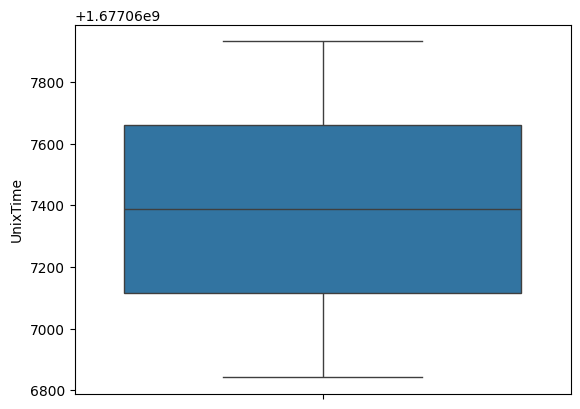

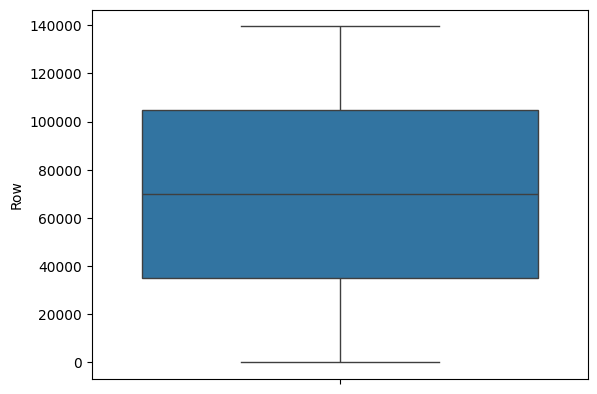

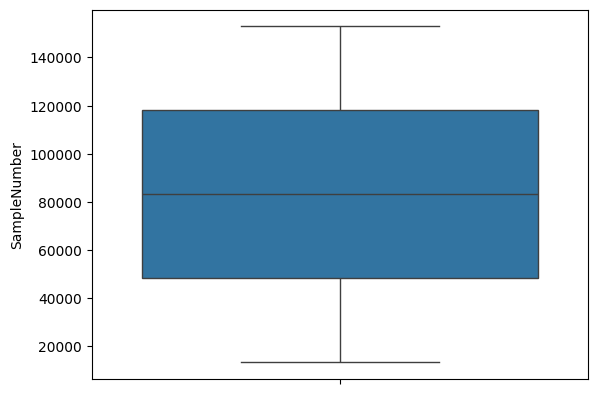

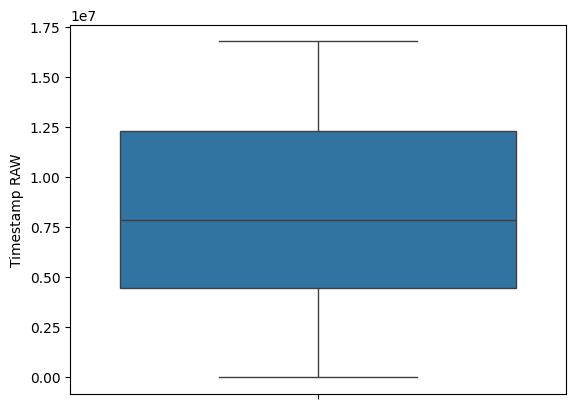

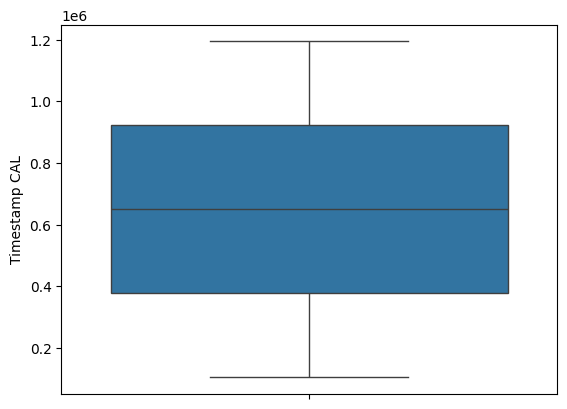

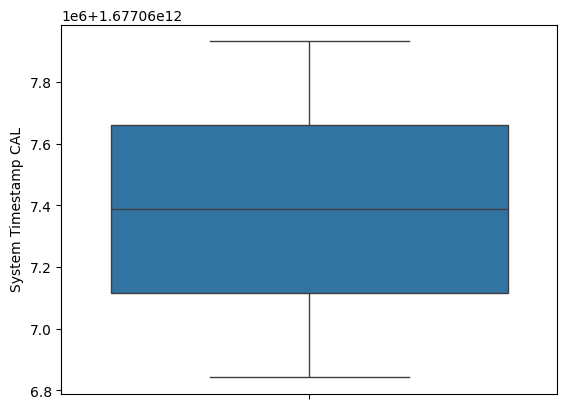

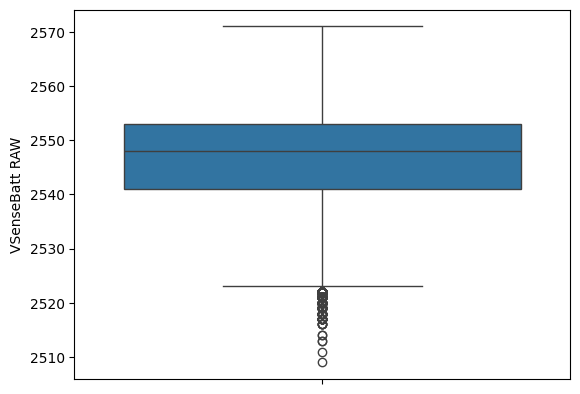

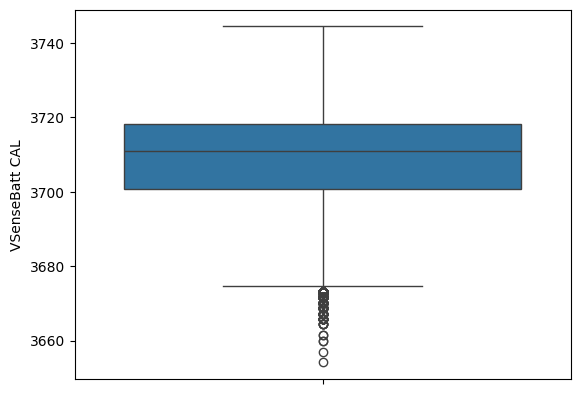

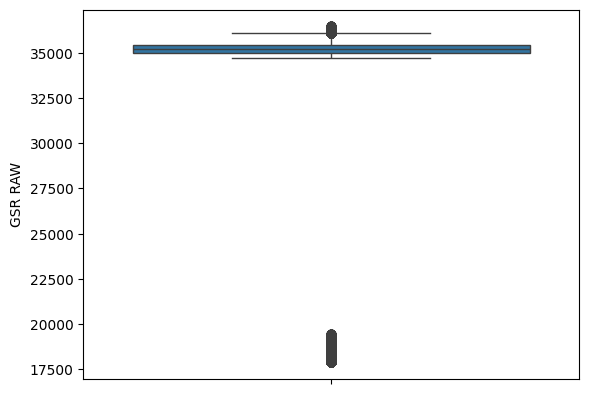

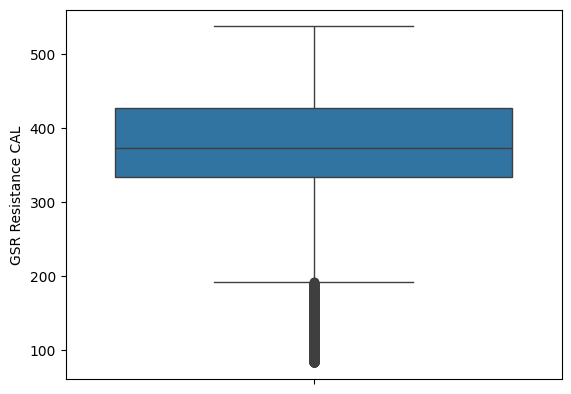

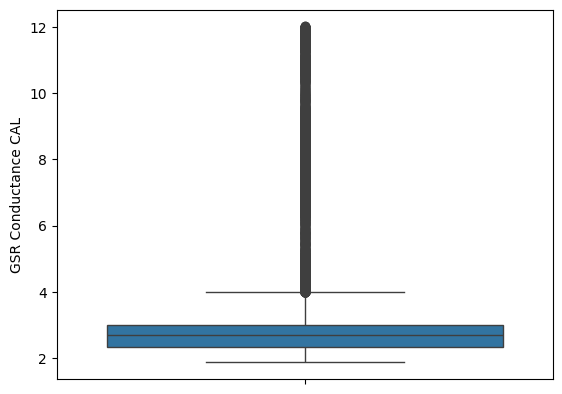

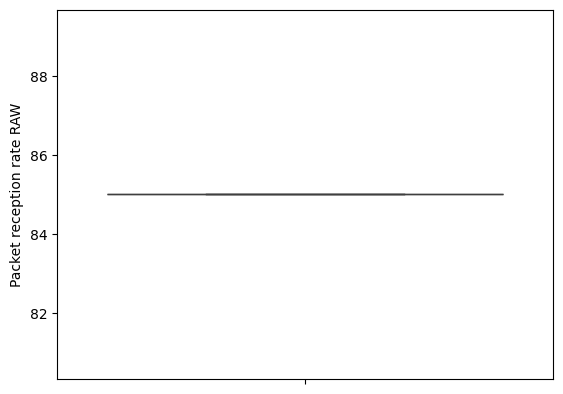

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
gsr_ol=gsr.select_dtypes(include=['float64','int64']).columns
for col in gsr_ol:
    
   sns.boxplot(data=gsr[col])
   plt.xticks(rotation=45)
   plt.show()

In [4]:
print(gsr.columns.tolist())

['UnixTime', 'Row', 'QuestionKey', 'Timestamp', 'SampleNumber', 'Timestamp RAW', 'Timestamp CAL', 'System Timestamp CAL', 'VSenseBatt RAW', 'VSenseBatt CAL', 'GSR RAW', 'GSR Resistance CAL', 'GSR Conductance CAL', 'Packet reception rate RAW']


In [5]:
gsr=gsr.dropna(subset=['SampleNumber', 'Timestamp RAW', 'Timestamp CAL', 'System Timestamp CAL', 'VSenseBatt RAW', 'VSenseBatt CAL', 'GSR RAW', 'GSR Resistance CAL', 'GSR Conductance CAL', 'Packet reception rate RAW'])

In [6]:
gsr.isnull().sum()

UnixTime                         0
Row                              0
QuestionKey                  48802
Timestamp                        0
SampleNumber                     0
Timestamp RAW                    0
Timestamp CAL                    0
System Timestamp CAL             0
VSenseBatt RAW                   0
VSenseBatt CAL                   0
GSR RAW                          0
GSR Resistance CAL               0
GSR Conductance CAL              0
Packet reception rate RAW        0
dtype: int64

In [7]:
for col in gsr.select_dtypes(include=['object']).columns:
    gsr[col]=gsr[col].fillna(gsr[col].mode()[0])

In [8]:
gsr.isnull().sum()

UnixTime                     0
Row                          0
QuestionKey                  0
Timestamp                    0
SampleNumber                 0
Timestamp RAW                0
Timestamp CAL                0
System Timestamp CAL         0
VSenseBatt RAW               0
VSenseBatt CAL               0
GSR RAW                      0
GSR Resistance CAL           0
GSR Conductance CAL          0
Packet reception rate RAW    0
dtype: int64

In [9]:
gsr['Timestamp']=pd.to_datetime(gsr['Timestamp'], errors='coerce')

In [10]:
gsr.head()

UnixTime  Row QuestionKey                  Timestamp  SampleNumber  \
1  1.677067e+09    2      1Item8 2023-02-22 17:24:02.034250       13405.0   
2  1.677067e+09    3      1Item8 2023-02-22 17:24:02.042063       13406.0   
3  1.677067e+09    4      1Item8 2023-02-22 17:24:02.049875       13407.0   
4  1.677067e+09    5      1Item8 2023-02-22 17:24:02.057688       13408.0   
5  1.677067e+09    6      1Item8 2023-02-22 17:24:02.065500       13409.0   

   Timestamp RAW  Timestamp CAL  System Timestamp CAL  VSenseBatt RAW  \
1      5307975.0    104726.5625          1.677067e+12          2538.0   
2      5308231.0    104734.3750          1.677067e+12          2557.0   
3      5308487.0    104742.1875          1.677067e+12          2556.0   
4      5308743.0    104750.0000          1.677067e+12          2565.0   
5      5308999.0    104757.8125          1.677067e+12          2545.0   

   VSenseBatt CAL  GSR RAW  GSR Resistance CAL  GSR Conductance CAL  \
1     3696.369231  35408.0          348.659004             2.868132   
2     3724.041026  35408.0          348.659004             2.868132   
3     3722.584615  35409.0          348.480980             2.869597   
4     3735.692308  35407.0          348.837209             2.866667   
5     3706.564103  35409.0          348.480980             2.869597   

   Packet reception rate RAW  
1                       85.0  
2                       85.0  
3                       85.0  
4                       85.0  
5                       85.0

In [11]:
gsr.dtypes

UnixTime                            float64
Row                                   int64
QuestionKey                          object
Timestamp                    datetime64[ns]
SampleNumber                        float64
Timestamp RAW                       float64
Timestamp CAL                       float64
System Timestamp CAL                float64
VSenseBatt RAW                      float64
VSenseBatt CAL                      float64
GSR RAW                             float64
GSR Resistance CAL                  float64
GSR Conductance CAL                 float64
Packet reception rate RAW           float64
dtype: object

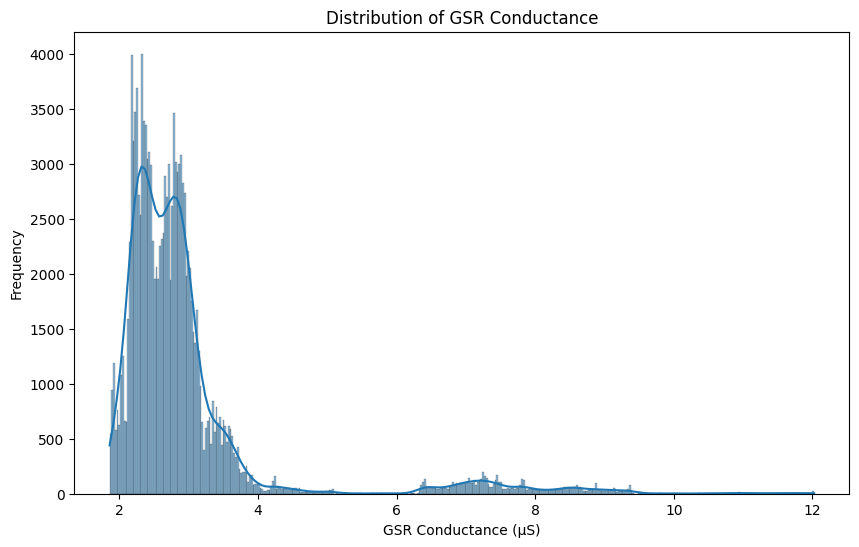

In [12]:
# 1. GSR Conductance Distribution
plt.figure(figsize=(10, 6))
sns.histplot(gsr['GSR Conductance CAL'], kde=True)
plt.title('Distribution of GSR Conductance')
plt.xlabel('GSR Conductance (µS)')
plt.ylabel('Frequency')
# plt.savefig('gsr_conductance_distribution.png')
plt.show()



**Observation:**

The plot shows a **unimodal distribution of GSR Conductance values, highly skewed to the right.** The **tallest peak** occurs at a relatively low conductance value, specifically around **3 $\mu$S**. Frequencies rapidly decrease as conductance values increase, with a long tail extending towards higher values. This indicates that most of the recorded GSR data points are concentrated at lower conductance levels, and higher conductance readings are much less frequent.

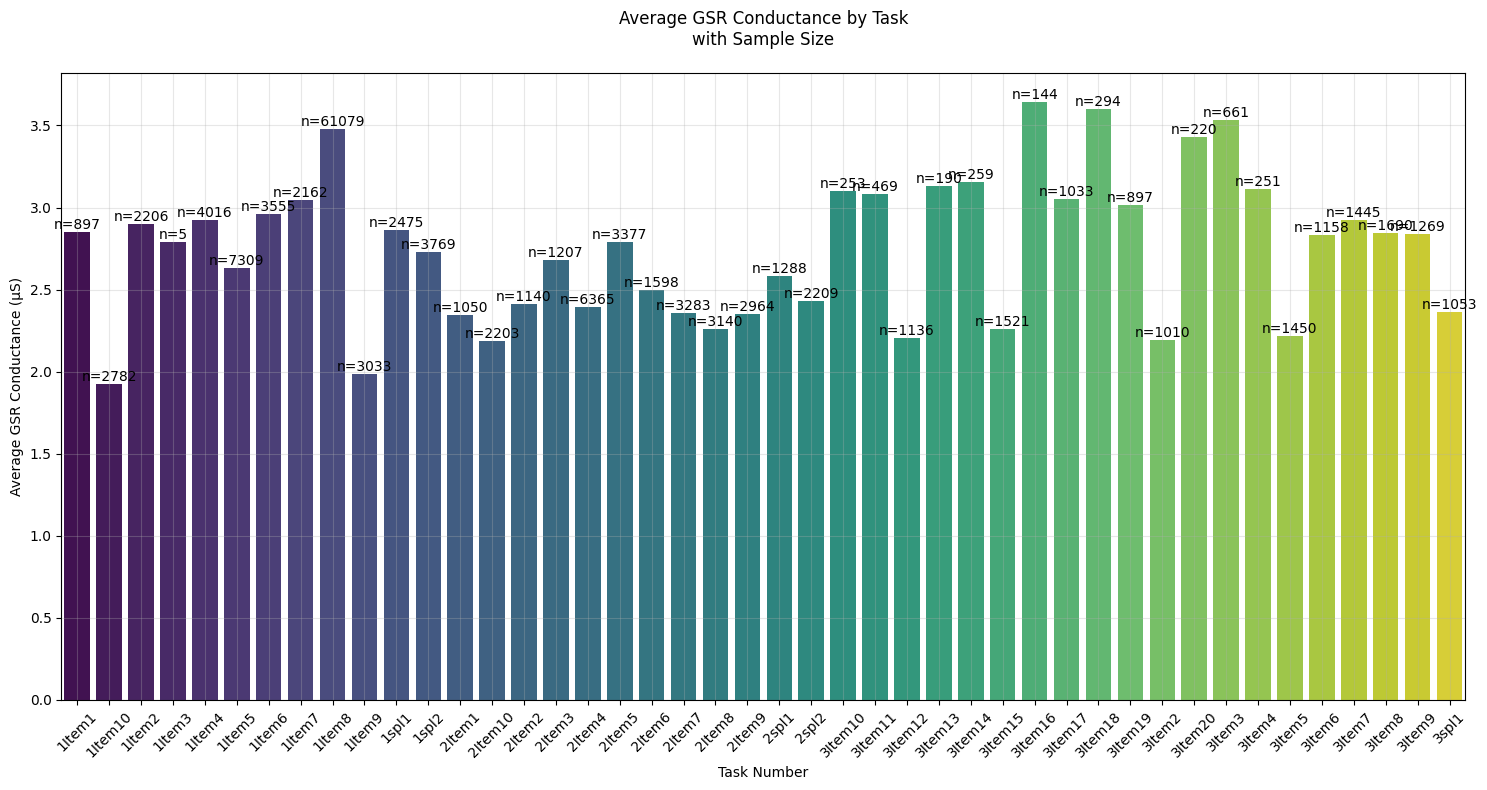

In [13]:
# Grouping GSR data by QuestionKey and calculating stats
task_gsr = gsr.groupby('QuestionKey')['GSR Conductance CAL'].agg(['mean', 'count']).reset_index()

# Set up the plot
plt.figure(figsize=(15, 8))

# Create a barplot of the mean GSR for each task
# ax = sns.barplot(x='QuestionKey', y='mean', data=task_gsr, palette='viridis')
ax = sns.barplot(x='QuestionKey', y='mean', data=task_gsr, hue='QuestionKey', palette='viridis', legend=False)

# Add text labels on each bar showing the sample size
for i, row in task_gsr.iterrows():
    plt.text(i, row['mean'], f'n={int(row["count"])}', 
             ha='center', va='bottom')

# Title and axis labels
plt.title('Average GSR Conductance by Task\nwith Sample Size', pad=20)
plt.xlabel('Task Number')
plt.ylabel('Average GSR Conductance (µS)')

# Improve readability: rotate x-axis labels
plt.xticks(rotation=45)

# Add a light grid
plt.grid(True, alpha=0.3)

# Adjust layout to fit elements nicely
plt.tight_layout()

# Save the figure as a PNG with high resolution
# plt.savefig('gsr_by_task_no_errorbar.png', bbox_inches='tight', dpi=300)

# Close the plot (good practice when generating multiple plots)
plt.show()


The plot shows **average GSR conductance varying across many "Task Numbers,"** ranging from about 0.5 to 3.5 $\mu$S with **no clear trend**. Each average has a **sample size (n=)** indicated, which varies widely (e.g., 101 to over 3000), affecting the reliability of the averages. The color gradient hints at task groupings.

In [14]:
gsr.columns.tolist()

['UnixTime',
 'Row',
 'QuestionKey',
 'Timestamp',
 'SampleNumber',
 'Timestamp RAW',
 'Timestamp CAL',
 'System Timestamp CAL',
 'VSenseBatt RAW',
 'VSenseBatt CAL',
 'GSR RAW',
 'GSR Resistance CAL',
 'GSR Conductance CAL',
 'Packet reception rate RAW']

In [16]:
gsr.head()

UnixTime  Row QuestionKey                  Timestamp  SampleNumber  \
1  1.677067e+09    2      1Item8 2023-02-22 17:24:02.034250       13405.0   
2  1.677067e+09    3      1Item8 2023-02-22 17:24:02.042063       13406.0   
3  1.677067e+09    4      1Item8 2023-02-22 17:24:02.049875       13407.0   
4  1.677067e+09    5      1Item8 2023-02-22 17:24:02.057688       13408.0   
5  1.677067e+09    6      1Item8 2023-02-22 17:24:02.065500       13409.0   

   Timestamp RAW  Timestamp CAL  System Timestamp CAL  VSenseBatt RAW  \
1      5307975.0    104726.5625          1.677067e+12          2538.0   
2      5308231.0    104734.3750          1.677067e+12          2557.0   
3      5308487.0    104742.1875          1.677067e+12          2556.0   
4      5308743.0    104750.0000          1.677067e+12          2565.0   
5      5308999.0    104757.8125          1.677067e+12          2545.0   

   VSenseBatt CAL  GSR RAW  GSR Resistance CAL  GSR Conductance CAL  \
1     3696.369231  35408.0          348.659004             2.868132   
2     3724.041026  35408.0          348.659004             2.868132   
3     3722.584615  35409.0          348.480980             2.869597   
4     3735.692308  35407.0          348.837209             2.866667   
5     3706.564103  35409.0          348.480980             2.869597   

   Packet reception rate RAW  
1                       85.0  
2                       85.0  
3                       85.0  
4                       85.0  
5                       85.0

## **PSY**

In [17]:
import pandas as pd
psy=pd.read_csv('34_PSY.csv')
psy.head()

Key  Category QuestionNumber matchOrnomatch Difficulty  verdict  \
0   1spl1         1           spl1          match       Easy  CORRECT   
1   1spl2         1           spl2        nomatch       Easy  CORRECT   
2  1Item1         1          Item1          match       Easy  CORRECT   
3  1Item2         1          Item2          match       Easy  CORRECT   
4  1Item3         1          Item3          match       Easy  CORRECT   

   ResponseTime  routineStart          routineStamp    routineEnd  \
0     19.338383  1.677067e+09  22/02/2023, 17:25:53  1.677067e+09   
1     29.443681  1.677067e+09  22/02/2023, 17:26:12  1.677067e+09   
2      7.007279  1.677067e+09  22/02/2023, 17:26:42  1.677067e+09   
3     17.238153  1.677067e+09  22/02/2023, 17:26:49  1.677067e+09   
4      0.039050  1.677067e+09  22/02/2023, 17:27:06  1.677067e+09   

   Cat2FeedbackTime  
0               NaN  
1               NaN  
2               NaN  
3               NaN  
4               NaN

In [18]:
psy.dtypes

Key                  object
Category              int64
QuestionNumber       object
matchOrnomatch       object
Difficulty           object
verdict              object
ResponseTime        float64
routineStart        float64
routineStamp         object
routineEnd          float64
Cat2FeedbackTime    float64
dtype: object

In [19]:
psy.isnull().sum()

Key                  0
Category             0
QuestionNumber       0
matchOrnomatch       0
Difficulty           0
verdict              0
ResponseTime         0
routineStart         0
routineStamp         0
routineEnd           0
Cat2FeedbackTime    34
dtype: int64

In [20]:
psy.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
dtype: bool

In [21]:
psy['routineStart'] = pd.to_datetime(psy['routineStart'], errors='coerce')
psy['routineEnd'] = pd.to_datetime(psy['routineEnd'], errors='coerce')

In [22]:
psy.dtypes

Key                         object
Category                     int64
QuestionNumber              object
matchOrnomatch              object
Difficulty                  object
verdict                     object
ResponseTime               float64
routineStart        datetime64[ns]
routineStamp                object
routineEnd          datetime64[ns]
Cat2FeedbackTime           float64
dtype: object

In [23]:
psy['routineStamp'] = pd.to_datetime(psy['routineStamp'], dayfirst=True)

In [24]:
psy.dtypes

Key                         object
Category                     int64
QuestionNumber              object
matchOrnomatch              object
Difficulty                  object
verdict                     object
ResponseTime               float64
routineStart        datetime64[ns]
routineStamp        datetime64[ns]
routineEnd          datetime64[ns]
Cat2FeedbackTime           float64
dtype: object

In [25]:
psy.head()

Key  Category QuestionNumber matchOrnomatch Difficulty  verdict  \
0   1spl1         1           spl1          match       Easy  CORRECT   
1   1spl2         1           spl2        nomatch       Easy  CORRECT   
2  1Item1         1          Item1          match       Easy  CORRECT   
3  1Item2         1          Item2          match       Easy  CORRECT   
4  1Item3         1          Item3          match       Easy  CORRECT   

   ResponseTime                  routineStart        routineStamp  \
0     19.338383 1970-01-01 00:00:01.677066953 2023-02-22 17:25:53   
1     29.443681 1970-01-01 00:00:01.677066972 2023-02-22 17:26:12   
2      7.007279 1970-01-01 00:00:01.677067002 2023-02-22 17:26:42   
3     17.238153 1970-01-01 00:00:01.677067009 2023-02-22 17:26:49   
4      0.039050 1970-01-01 00:00:01.677067026 2023-02-22 17:27:06   

                     routineEnd  Cat2FeedbackTime  
0 1970-01-01 00:00:01.677066972               NaN  
1 1970-01-01 00:00:01.677067002               NaN  
2 1970-01-01 00:00:01.677067009               NaN  
3 1970-01-01 00:00:01.677067026               NaN  
4 1970-01-01 00:00:01.677067026               NaN

In [26]:
psy['ResponseTime'] = psy['ResponseTime'].round(2)

In [27]:
psy.head()

Key  Category QuestionNumber matchOrnomatch Difficulty  verdict  \
0   1spl1         1           spl1          match       Easy  CORRECT   
1   1spl2         1           spl2        nomatch       Easy  CORRECT   
2  1Item1         1          Item1          match       Easy  CORRECT   
3  1Item2         1          Item2          match       Easy  CORRECT   
4  1Item3         1          Item3          match       Easy  CORRECT   

   ResponseTime                  routineStart        routineStamp  \
0         19.34 1970-01-01 00:00:01.677066953 2023-02-22 17:25:53   
1         29.44 1970-01-01 00:00:01.677066972 2023-02-22 17:26:12   
2          7.01 1970-01-01 00:00:01.677067002 2023-02-22 17:26:42   
3         17.24 1970-01-01 00:00:01.677067009 2023-02-22 17:26:49   
4          0.04 1970-01-01 00:00:01.677067026 2023-02-22 17:27:06   

                     routineEnd  Cat2FeedbackTime  
0 1970-01-01 00:00:01.677066972               NaN  
1 1970-01-01 00:00:01.677067002               NaN  
2 1970-01-01 00:00:01.677067009               NaN  
3 1970-01-01 00:00:01.677067026               NaN  
4 1970-01-01 00:00:01.677067026               NaN

In [28]:
psy.shape

(44, 11)

In [29]:
if 'Cat2FeedbackTime' in psy.columns:
    psy['Cat2FeedbackTime'] = psy['Cat2FeedbackTime'].round(2)

In [30]:
import numpy as np
numeric_cols = psy.select_dtypes(include=[np.number]).columns
outlier_cols = []
for col in numeric_cols:
    Q1 = psy[col].quantile(0.25)
    Q3 = psy[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    if ((psy[col] < lower) | (psy[col] > upper)).any():
        outlier_cols.append(col)

In [31]:
for col in psy.columns:
    if psy[col].isnull().any():
        if col in outlier_cols:
            psy[col] = psy[col].fillna(psy[col].median())
        elif psy[col].dtype in ['float64', 'int64']:
            psy[col] = psy[col].fillna(psy[col].mean())
        else:
            psy[col] = psy[col].fillna(psy[col].mode()[0])

In [32]:
psy.isnull().sum()

Key                 0
Category            0
QuestionNumber      0
matchOrnomatch      0
Difficulty          0
verdict             0
ResponseTime        0
routineStart        0
routineStamp        0
routineEnd          0
Cat2FeedbackTime    0
dtype: int64

In [33]:
psy.columns.tolist()

['Key',
 'Category',
 'QuestionNumber',
 'matchOrnomatch',
 'Difficulty',
 'verdict',
 'ResponseTime',
 'routineStart',
 'routineStamp',
 'routineEnd',
 'Cat2FeedbackTime']

In [34]:
psy_cr=psy.select_dtypes(include=['float64','int64'])
psy_corr=psy_cr.corr().round(2)
psy_corr

Category  ResponseTime  Cat2FeedbackTime
Category              1.00         -0.55             -0.04
ResponseTime         -0.55          1.00             -0.06
Cat2FeedbackTime     -0.04         -0.06              1.00

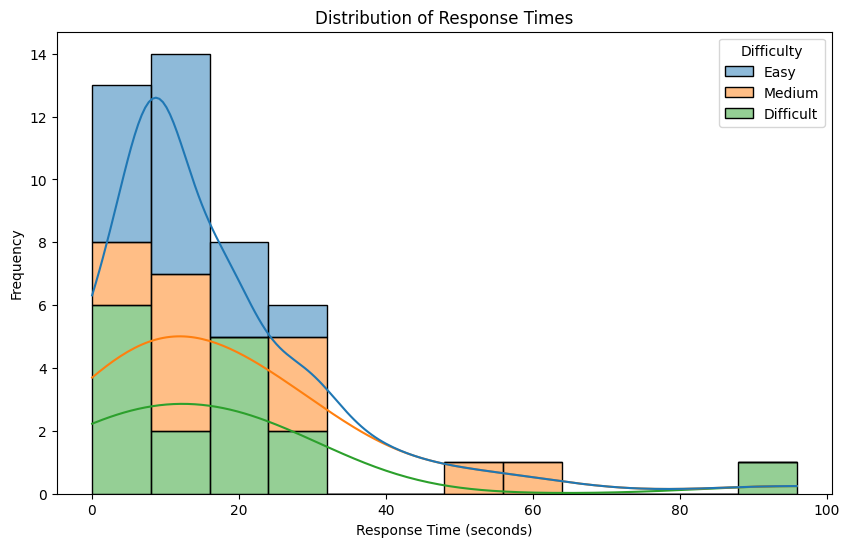

In [35]:
# 1. Response Time Distribution
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
# sns.histplot(psy['ResponseTime'], kde=True,)
sns.histplot(data=psy, x='ResponseTime', hue='Difficulty', kde=True, multiple='stack')
plt.title('Distribution of Response Times')
plt.xlabel('Response Time (seconds)')
plt.ylabel('Frequency')
# plt.savefig('response_time_distribution.png')
plt.show()

The distribution of response times clearly varies by task difficulty. Easy tasks were answered quickly and consistently, while difficult tasks resulted in slower and more variable response times. Medium tasks fell in between. This pattern highlights that task difficulty meaningfully influences the cognitive effort or processing time required during mental rotation tasks.

In [36]:
# Assuming both have a common task identifier — looks like 'QuestionNumber' from PSY vs 'QuestionKey' from GSR
merged_df = pd.merge(gsr, psy, left_on='QuestionKey', right_on='QuestionNumber', how='inner')

print(merged_df.columns)  # Verify merged columns


Index(['UnixTime', 'Row', 'QuestionKey', 'Timestamp', 'SampleNumber',
       'Timestamp RAW', 'Timestamp CAL', 'System Timestamp CAL',
       'VSenseBatt RAW', 'VSenseBatt CAL', 'GSR RAW', 'GSR Resistance CAL',
       'GSR Conductance CAL', 'Packet reception rate RAW', 'Key', 'Category',
       'QuestionNumber', 'matchOrnomatch', 'Difficulty', 'verdict',
       'ResponseTime', 'routineStart', 'routineStamp', 'routineEnd',
       'Cat2FeedbackTime'],
      dtype='object')


In [37]:
print(gsr['QuestionKey'].unique()[:10])
print(psy['QuestionNumber'].unique()[:10])


['1Item8' '1spl1' '1spl2' '1Item1' '1Item2' '1Item3' '1Item4' '1Item5'
 '1Item6' '1Item7']
['spl1' 'spl2' 'Item1' 'Item2' 'Item3' 'Item4' 'Item5' 'Item6' 'Item7'
 'Item8']


In [38]:
# Strip the leading digit from GSR QuestionKey
gsr['CleanKey'] = gsr['QuestionKey'].str.replace(r'^\d+', '', regex=True)

# Verify cleaned keys
print(gsr['CleanKey'].unique()[:10])

['Item8' 'spl1' 'spl2' 'Item1' 'Item2' 'Item3' 'Item4' 'Item5' 'Item6'
 'Item7']


In [39]:
# Now merge on cleaned key
merged_df = pd.merge(gsr, psy, left_on='CleanKey', right_on='QuestionNumber', how='inner')

# Check the result
print(f"Merged data shape: {merged_df.shape}")
print(merged_df.head())

Merged data shape: (398294, 26)
       UnixTime  Row QuestionKey                  Timestamp  SampleNumber  \
0  1.677067e+09    2      1Item8 2023-02-22 17:24:02.034250       13405.0   
1  1.677067e+09    2      1Item8 2023-02-22 17:24:02.034250       13405.0   
2  1.677067e+09    2      1Item8 2023-02-22 17:24:02.034250       13405.0   
3  1.677067e+09    3      1Item8 2023-02-22 17:24:02.042063       13406.0   
4  1.677067e+09    3      1Item8 2023-02-22 17:24:02.042063       13406.0   

   Timestamp RAW  Timestamp CAL  System Timestamp CAL  VSenseBatt RAW  \
0      5307975.0    104726.5625          1.677067e+12          2538.0   
1      5307975.0    104726.5625          1.677067e+12          2538.0   
2      5307975.0    104726.5625          1.677067e+12          2538.0   
3      5308231.0    104734.3750          1.677067e+12          2557.0   
4      5308231.0    104734.3750          1.677067e+12          2557.0   

   VSenseBatt CAL  ...  Category  QuestionNumber  matchOrnomatch  

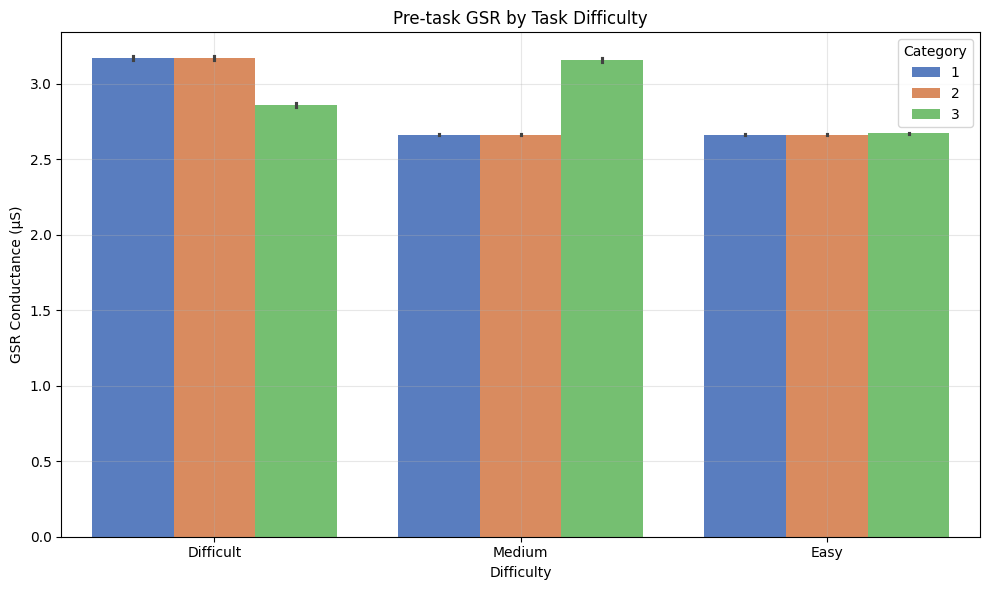

In [40]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Difficulty', y='GSR Conductance CAL', data=merged_df, palette='muted',hue='Category')
plt.title('Pre-task GSR by Task Difficulty')
plt.xlabel('Difficulty')
plt.ylabel('GSR Conductance (µS)')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


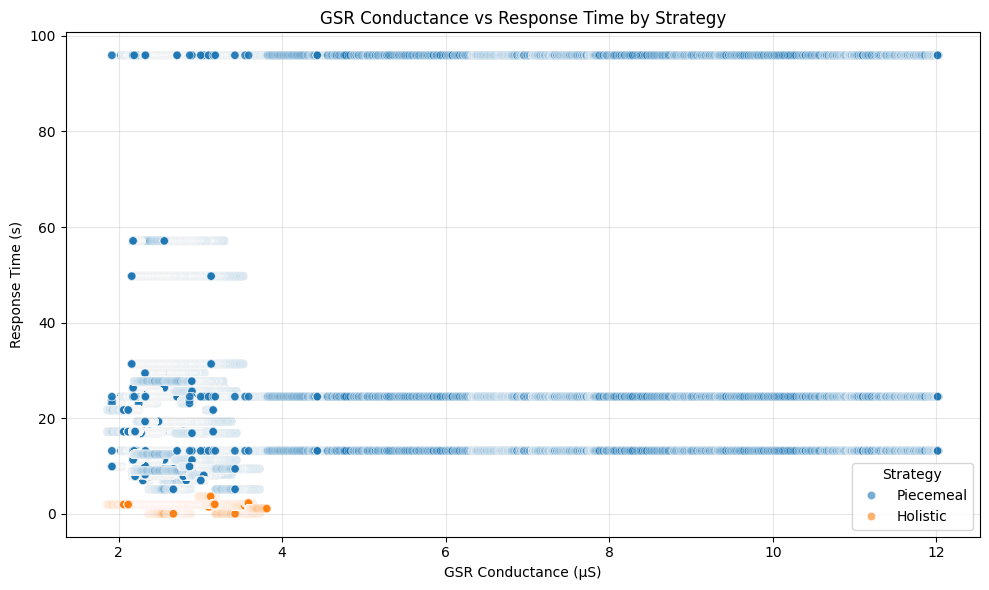

In [42]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GSR Conductance CAL', y='ResponseTime', hue='Strategy', data=merged_df, alpha=0.6)
plt.title('GSR Conductance vs Response Time by Strategy')
plt.xlabel('GSR Conductance (µS)')
plt.ylabel('Response Time (s)')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


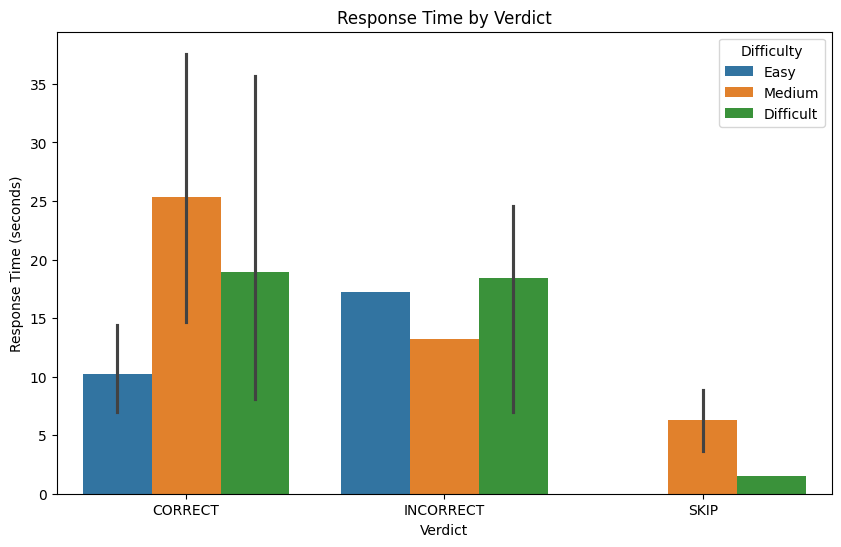

In [44]:
# 3. Response Time by Verdict
plt.figure(figsize=(10, 6))
sns.barplot(x='verdict', y='ResponseTime', data=psy,hue='Difficulty')
plt.title('Response Time by Verdict')
plt.xlabel('Verdict')
plt.ylabel('Response Time (seconds)')
# plt.savefig('response_time_by_verdict.png')
plt.show()

## **TIVA**

In [45]:
tv=pd.read_csv('34_TIVA.csv')
tv.head()

UnixTime  Row QuestionKey                   Timestamp  SampleNumber  \
0  1.677067e+09    1         NaN  2023-02-22 17:24:02.031996           NaN   
1  1.677067e+09    2         NaN  2023-02-22 17:24:02.106341          -1.0   
2  1.677067e+09    3         NaN  2023-02-22 17:24:02.219956          -1.0   
3  1.677067e+09    4         NaN  2023-02-22 17:24:02.315961          -1.0   
4  1.677067e+09    5         NaN  2023-02-22 17:24:02.323953           NaN   

      Anger  Contempt   Disgust      Fear       Joy  ...  Nose Wrinkle  \
0       NaN       NaN       NaN       NaN       NaN  ...           NaN   
1  0.089570  0.113435  0.024132  0.260376  0.024042  ...      0.020135   
2  0.095402  0.124239  0.024200  0.231453  0.024042  ...      0.053123   
3       NaN       NaN       NaN       NaN       NaN  ...           NaN   
4       NaN       NaN       NaN       NaN       NaN  ...           NaN   

      Smile    Smirk  Upper Lip Raise  Blink  BlinkRate     Pitch       Yaw  \
0       NaN      NaN              NaN    NaN        NaN       NaN       NaN   
1  0.000377  0.02932         0.005742    1.0       24.0 -1.734431 -0.097879   
2  0.000314  0.03043         0.012113    0.0       18.0 -1.520735 -1.403051   
3       NaN      NaN              NaN    NaN        NaN       NaN       NaN   
4       NaN      NaN              NaN    NaN        NaN       NaN       NaN   

       Roll  Interocular Distance  
0       NaN                   NaN  
1  4.709353            150.337982  
2  4.984594            151.255890  
3       NaN                   NaN  
4       NaN                   NaN  

[5 rows x 44 columns]

In [46]:
tv.dtypes

UnixTime                float64
Row                       int64
QuestionKey              object
Timestamp                object
SampleNumber            float64
Anger                   float64
Contempt                float64
Disgust                 float64
Fear                    float64
Joy                     float64
Sadness                 float64
Surprise                float64
Engagement              float64
Valence                 float64
Sentimentality          float64
Confusion               float64
Neutral                 float64
Attention               float64
Brow Furrow             float64
Brow Raise              float64
Cheek Raise             float64
Chin Raise              float64
Dimpler                 float64
Eye Closure             float64
Eye Widen               float64
Inner Brow Raise        float64
Jaw Drop                float64
Lip Corner Depressor    float64
Lip Press               float64
Lip Pucker              float64
Lip Stretch             float64
Lip Suck

In [47]:
tv['Timestamp'] = pd.to_datetime(tv['Timestamp'], errors='coerce')

In [48]:
print(tv.duplicated())

0        False
1        False
2        False
3        False
4        False
         ...  
11030    False
11031    False
11032    False
11033    False
11034    False
Length: 11035, dtype: bool


In [49]:
 tv.shape

(11035, 44)

In [50]:
tv.isnull().sum()

UnixTime                   0
Row                        0
QuestionKey             3864
Timestamp                  0
SampleNumber               4
Anger                    952
Contempt                 952
Disgust                  952
Fear                     952
Joy                      952
Sadness                  952
Surprise                 952
Engagement               952
Valence                  952
Sentimentality           952
Confusion                952
Neutral                  952
Attention                952
Brow Furrow              952
Brow Raise               952
Cheek Raise              952
Chin Raise               952
Dimpler                  952
Eye Closure              952
Eye Widen                952
Inner Brow Raise         952
Jaw Drop                 952
Lip Corner Depressor     952
Lip Press                952
Lip Pucker               952
Lip Stretch              952
Lip Suck                 952
Lid Tighten              952
Mouth Open               952
Nose Wrinkle  

In [51]:
# Identify columns with outliers using IQR
numeric_cols = tv.select_dtypes(include=[np.number]).columns
outlier_cols = []
for col in numeric_cols:
    Q1 = tv[col].quantile(0.25)
    Q3 = tv[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    if ((tv[col] < lower) | (tv[col] > upper)).any():
        print(outlier_cols.append(col))

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


In [52]:
for col in tv.columns:
    if tv[col].isnull().any():
        if col in outlier_cols:
            tv[col] = tv[col].fillna(tv[col].median())
        elif tv[col].dtype in ['float64', 'int64']:
            tv[col] = tv[col].fillna(tv[col].mean())
        else:
            tv[col] = tv[col].fillna(tv[col].mode()[0])

In [53]:
tv.isnull().sum()

UnixTime                0
Row                     0
QuestionKey             0
Timestamp               0
SampleNumber            0
Anger                   0
Contempt                0
Disgust                 0
Fear                    0
Joy                     0
Sadness                 0
Surprise                0
Engagement              0
Valence                 0
Sentimentality          0
Confusion               0
Neutral                 0
Attention               0
Brow Furrow             0
Brow Raise              0
Cheek Raise             0
Chin Raise              0
Dimpler                 0
Eye Closure             0
Eye Widen               0
Inner Brow Raise        0
Jaw Drop                0
Lip Corner Depressor    0
Lip Press               0
Lip Pucker              0
Lip Stretch             0
Lip Suck                0
Lid Tighten             0
Mouth Open              0
Nose Wrinkle            0
Smile                   0
Smirk                   0
Upper Lip Raise         0
Blink       

In [54]:
tv_cr=tv.select_dtypes(include=['float64','int64'])
tv_corr=tv_cr.corr().round(2)
tv_corr

UnixTime   Row  SampleNumber  Anger  Contempt  Disgust  \
UnixTime                  1.00  1.00          1.00   0.18      0.02     0.13   
Row                       1.00  1.00          1.00   0.18      0.02     0.13   
SampleNumber              1.00  1.00          1.00   0.18      0.02     0.13   
Anger                     0.18  0.18          0.18   1.00      0.03     0.78   
Contempt                  0.02  0.02          0.02   0.03      1.00    -0.02   
Disgust                   0.13  0.13          0.13   0.78     -0.02     1.00   
Fear                      0.00  0.00          0.00   0.25     -0.01     0.06   
Joy                       0.12  0.12          0.12   0.79     -0.02     0.93   
Sadness                   0.07  0.07          0.07   0.05      0.00     0.04   
Surprise                  0.06  0.06          0.06   0.26     -0.01     0.33   
Engagement                0.12  0.12          0.12   0.70      0.05     0.85   
Valence                   0.08  0.08          0.08   0.66     -0.05     0.77   
Sentimentality            0.07  0.07          0.07   0.13     -0.00     0.41   
Confusion                 0.09  0.09          0.09   0.31     -0.01     0.56   
Neutral                  -0.14 -0.14         -0.14  -0.78     -0.12    -0.93   
Attention                -0.24 -0.24         -0.24  -0.16     -0.02    -0.17   
Brow Furrow               0.08  0.08          0.08   0.81     -0.01     0.66   
Brow Raise               -0.43 -0.43         -0.43  -0.02     -0.05     0.07   
Cheek Raise               0.13  0.13          0.13   0.78     -0.02     0.98   
Chin Raise                0.11  0.11          0.11   0.15      0.06     0.04   
Dimpler                  -0.02 -0.02         -0.02   0.03      0.94    -0.00   
Eye Closure               0.16  0.16          0.16   0.11      0.00     0.10   
Eye Widen                 0.02  0.02          0.02   0.32     -0.02     0.12   
Inner Brow Raise          0.10  0.10          0.10   0.57     -0.01     0.62   
Jaw Drop                  0.12  0.12          0.12   0.79     -0.02     0.89   
Lip Corner Depressor      0.22  0.22          0.22   0.17     -0.01     0.26   
Lip Press                 0.03  0.03          0.03   0.11      0.45    -0.00   
Lip Pucker                0.07  0.07          0.07   0.44     -0.01     0.46   
Lip Stretch               0.02  0.02          0.02   0.13      0.82     0.13   
Lip Suck                  0.03  0.03          0.03   0.08      0.00    -0.00   
Lid Tighten               0.12  0.12          0.12   0.79     -0.02     0.93   
Mouth Open                0.12  0.12          0.12   0.80     -0.02     0.91   
Nose Wrinkle              0.14  0.14          0.14   0.77     -0.02     0.99   
Smile                     0.12  0.12          0.12   0.80     -0.02     0.93   
Smirk                     0.09  0.09          0.09   0.69      0.39     0.77   
Upper Lip Raise           0.14  0.14          0.14   0.76     -0.02     0.98   
Blink                     0.02  0.02          0.02  -0.01      0.06     0.01   
BlinkRate                 0.25  0.25          0.25   0.22      0.00     0.22   
Pitch                     0.74  0.74          0.74   0.16      0.02     0.05   
Yaw                      -0.57 -0.57         -0.57   0.05     -0.05     0.17   
Roll                     -0.10 -0.10         -0.10  -0.05     -0.01    -0.06   
Interocular Distance      0.31  0.31          0.31  -0.18      0.02    -0.22   

                      Fear   Joy  Sadness  Surprise  ...  Nose Wrinkle  Smile  \
UnixTime              0.00  0.12     0.07      0.06  ...          0.14   0.12   
Row                   0.00  0.12     0.07      0.06  ...          0.14   0.12   
SampleNumber          0.00  0.12     0.07      0.06  ...          0.14   0.12   
Anger                 0.25  0.79     0.05      0.26  ...          0.77   0.80   
Contempt             -0.01 -0.02     0.00     -0.01  ...         -0.02  -0.02   
Disgust               0.06  0.93     0.04      0.33  ...          0.99   0.93   
Fear          

In [55]:
print(tv.columns.tolist())

['UnixTime', 'Row', 'QuestionKey', 'Timestamp', 'SampleNumber', 'Anger', 'Contempt', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise', 'Engagement', 'Valence', 'Sentimentality', 'Confusion', 'Neutral', 'Attention', 'Brow Furrow', 'Brow Raise', 'Cheek Raise', 'Chin Raise', 'Dimpler', 'Eye Closure', 'Eye Widen', 'Inner Brow Raise', 'Jaw Drop', 'Lip Corner Depressor', 'Lip Press', 'Lip Pucker', 'Lip Stretch', 'Lip Suck', 'Lid Tighten', 'Mouth Open', 'Nose Wrinkle', 'Smile', 'Smirk', 'Upper Lip Raise', 'Blink', 'BlinkRate', 'Pitch', 'Yaw', 'Roll', 'Interocular Distance']


In [56]:
tv.head()


UnixTime  Row QuestionKey                  Timestamp  SampleNumber  \
0  1.677067e+09    1      1Item8 2023-02-22 17:24:02.031996   5512.000272   
1  1.677067e+09    2      1Item8 2023-02-22 17:24:02.106341     -1.000000   
2  1.677067e+09    3      1Item8 2023-02-22 17:24:02.219956     -1.000000   
3  1.677067e+09    4      1Item8 2023-02-22 17:24:02.315961     -1.000000   
4  1.677067e+09    5      1Item8 2023-02-22 17:24:02.323953   5512.000272   

      Anger  Contempt   Disgust      Fear       Joy  ...  Nose Wrinkle  \
0  0.123182  0.179642  0.024353  0.142297  0.024041  ...      0.073309   
1  0.089570  0.113435  0.024132  0.260376  0.024042  ...      0.020135   
2  0.095402  0.124239  0.024200  0.231453  0.024042  ...      0.053123   
3  0.123182  0.179642  0.024353  0.142297  0.024041  ...      0.073309   
4  0.123182  0.179642  0.024353  0.142297  0.024041  ...      0.073309   

      Smile     Smirk  Upper Lip Raise  Blink  BlinkRate     Pitch       Yaw  \
0  0.000007  0.015699         0.018587    0.0       18.0  4.249623 -1.748838   
1  0.000377  0.029320         0.005742    1.0       24.0 -1.734431 -0.097879   
2  0.000314  0.030430         0.012113    0.0       18.0 -1.520735 -1.403051   
3  0.000007  0.015699         0.018587    0.0       18.0  4.249623 -1.748838   
4  0.000007  0.015699         0.018587    0.0       18.0  4.249623 -1.748838   

       Roll  Interocular Distance  
0  4.030433            157.241959  
1  4.709353            150.337982  
2  4.984594            151.255890  
3  4.030433            157.241959  
4  4.030433            157.241959  

[5 rows x 44 columns]

In [57]:
tv.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
11030    False
11031    False
11032    False
11033    False
11034    False
Length: 11035, dtype: bool

Generating emotion distributions...


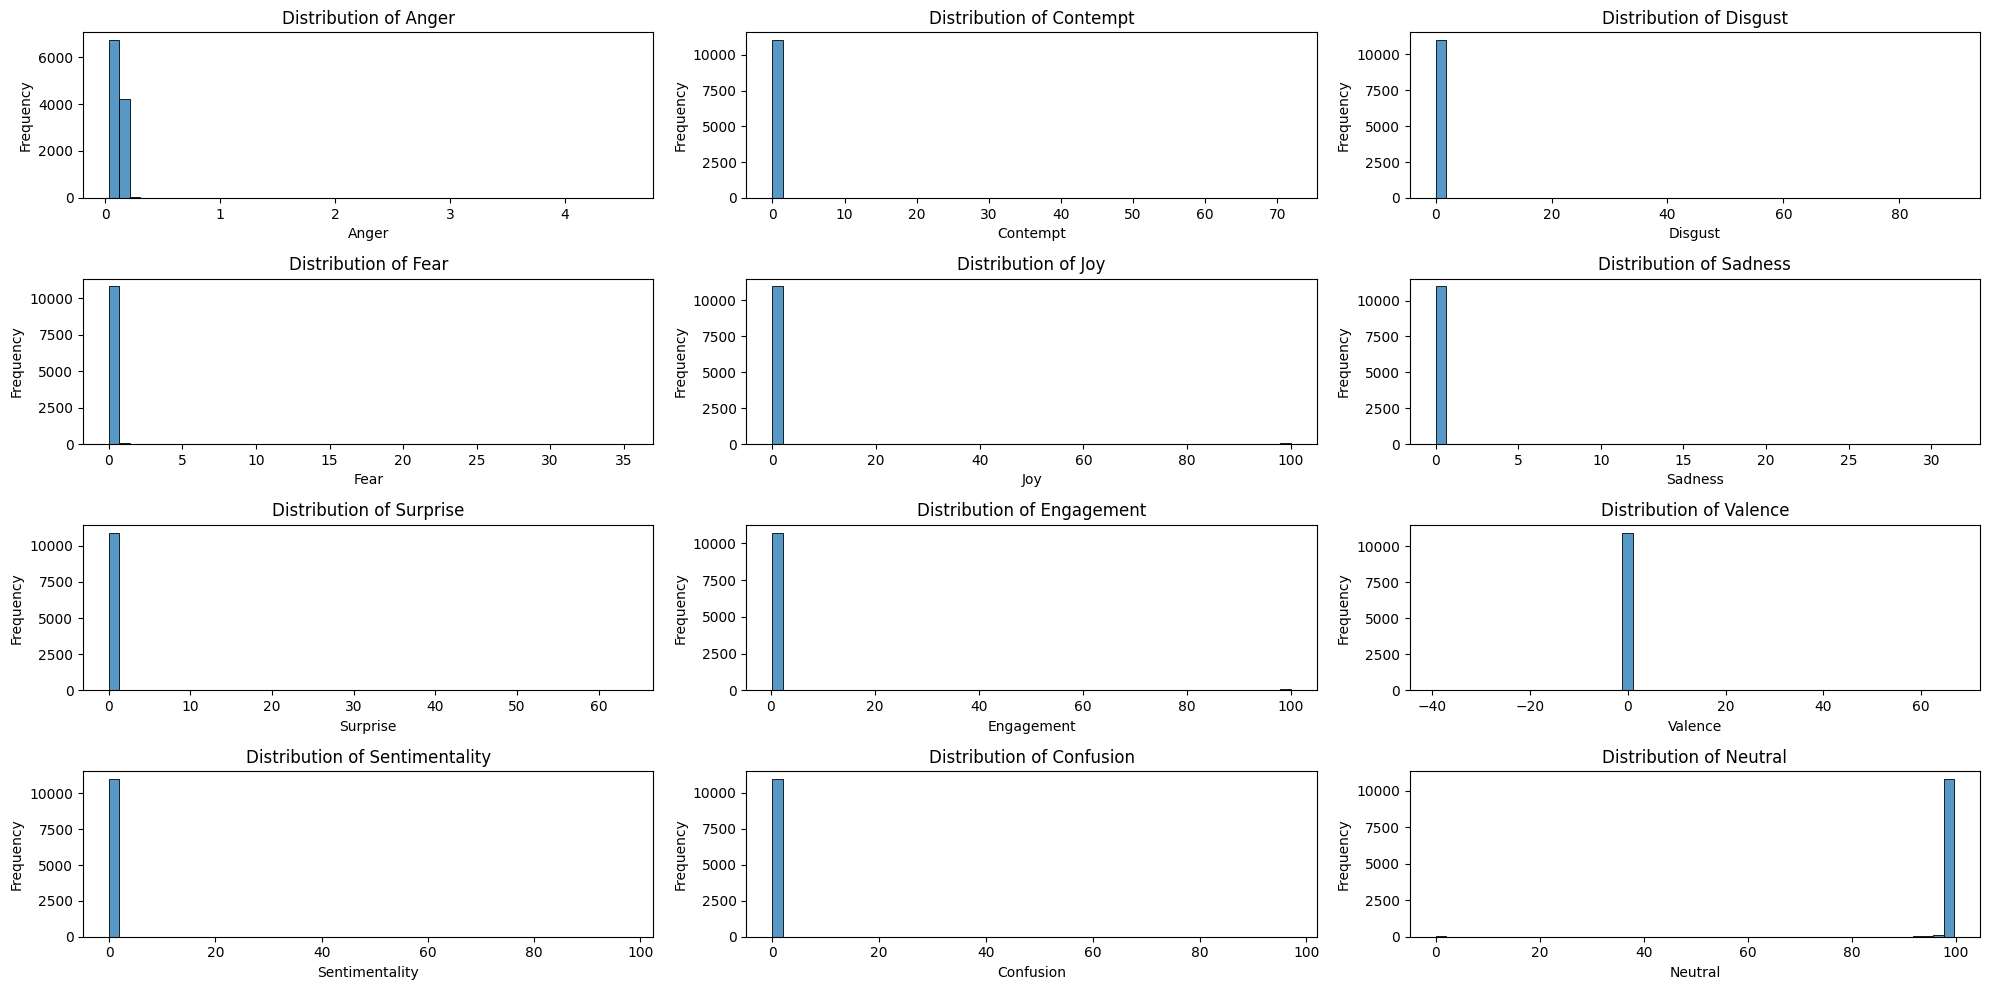

In [58]:
# 1. Plot Emotion Distributions
print("Generating emotion distributions...")
emotion_cols = ['Anger', 'Contempt', 'Disgust', 'Fear', 'Joy', 'Sadness', 
               'Surprise', 'Engagement', 'Valence', 'Sentimentality', 'Confusion', 'Neutral']

plt.figure(figsize=(20, 10))
for i, col in enumerate(emotion_cols, 1):
    plt.subplot(4, 3, i)
    sns.histplot(data=tv, x=col, bins=50)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
# plt.savefig('tiva_visualizations/emotion_distributions.png')
plt.show()


**Observation:**

The majority of emotion distributions (Anger, Contempt, Disgust, Fear, Sadness, Surprise, Sentimentality, Confusion, Neutral) are **highly right-skewed with a dominant peak at or near zero**. This indicates that **low-intensity emotional states are most frequent** in the dataset. In contrast, "Engagement" and "Valence" show **broader distributions**, suggesting a more varied range of scores for these emotional dimensions.

Generating attention metrics...


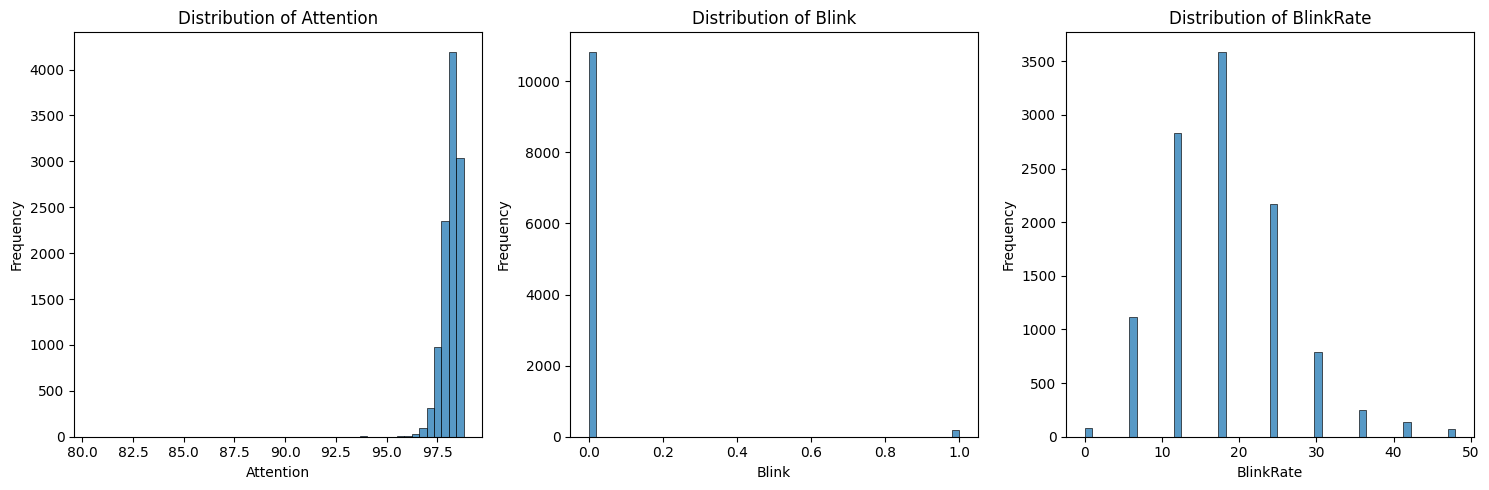

In [60]:
# 5. Plot Attention Metrics
print("Generating attention metrics...")
attention_cols = ['Attention', 'Blink', 'BlinkRate']

plt.figure(figsize=(15, 5))
for i, col in enumerate(attention_cols, 1):
    plt.subplot(1, 3, i)
    sns.histplot(data=tv, x=col, bins=50)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
# plt.savefig('tiva_visualizations/attention_metrics.png')
plt.show()

 * **Distribution of Attention**
* The vast majority of attention values cluster tightly between ~96 and 98.
* A small tail stretches down toward ~93.
* Interpretation:
The participant maintained high attention during most of the task.
Very few moments of low attention.

 * **Distribution of Blink**
* Almost all values are at 0 → meaning no blink at most time points.
* A few points at 1 → indicating actual blink events.
* Interpretation:
The participant blinked very rarely during the task (expected during focused work).

 * **Distribution of BlinkRate**
* Most of the blink rate values are low (5-18 blinks per time window).
* A long tail — a few moments had higher blink rates (up to 50).
* Interpretation:
The participant generally had a low blink rate, with occasional bursts of blinking (could indicate cognitive fatigue, distraction, or momentary breaks).

* **Overall inference**
 This figure tells you:
* The participant showed consistent high attention.
* Blinked rarely, as expected during a demanding visual-cognitive task.
* Blink rate spikes might mark brief moments of cognitive load relief, fatigue, or disengagement.



## **IVT**

In [61]:
import pandas as pd
iv=pd.read_csv('34_IVT.csv')
iv.head()

UnixTime  Row QuestionKey                   Timestamp  Gaze X  Gaze Y  \
0  1.677067e+09    1         NaN  2023-02-22 17:24:02.031996     NaN     NaN   
1  1.677067e+09    2         NaN  2023-02-22 17:24:02.038241     NaN     NaN   
2  1.677067e+09    3         NaN  2023-02-22 17:24:02.046576   939.5   829.5   
3  1.677067e+09    4         NaN  2023-02-22 17:24:02.054953   963.0   887.0   
4  1.677067e+09    5         NaN  2023-02-22 17:24:02.063303     NaN     NaN   

   Interpolated Gaze X  Interpolated Gaze Y  Interpolated Distance  \
0                  NaN                  NaN                    NaN   
1                  NaN                  NaN                    NaN   
2                939.5                829.5             622.332336   
3                963.0                887.0             622.416321   
4                  NaN                  NaN                    NaN   

   Gaze Velocity  ...  Saccade Index  Saccade Index by Stimulus  \
0            NaN  ...            NaN                        NaN   
1            NaN  ...            NaN                        NaN   
2            NaN  ...            NaN                        NaN   
3            NaN  ...            NaN                        NaN   
4            NaN  ...            NaN                        NaN   

   Saccade Start  Saccade End  Saccade Duration  Saccade Amplitude  \
0            NaN          NaN               NaN                NaN   
1            NaN          NaN               NaN                NaN   
2            NaN          NaN               NaN                NaN   
3            NaN          NaN               NaN                NaN   
4            NaN          NaN               NaN                NaN   

   Saccade Peak Velocity  Saccade Peak Acceleration  \
0                    NaN                        NaN   
1                    NaN                        NaN   
2                    NaN                        NaN   
3                    NaN                        NaN   
4                    NaN                        NaN   

   Saccade Peak Deceleration  Saccade Direction  
0                        NaN                NaN  
1                        NaN                NaN  
2                        NaN                NaN  
3                        NaN                NaN  
4                        NaN                NaN  

[5 rows x 29 columns]

In [62]:
iv.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
130808    False
130809    False
130810    False
130811    False
130812    False
Length: 130813, dtype: bool

In [63]:
iv.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
130808    False
130809    False
130810    False
130811    False
130812    False
Length: 130813, dtype: bool

In [64]:
iv.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
130808    False
130809    False
130810    False
130811    False
130812    False
Length: 130813, dtype: bool

In [65]:
iv.dtypes

UnixTime                      float64
Row                             int64
QuestionKey                    object
Timestamp                      object
Gaze X                        float64
Gaze Y                        float64
Interpolated Gaze X           float64
Interpolated Gaze Y           float64
Interpolated Distance         float64
Gaze Velocity                 float64
Gaze Acceleration             float64
Fixation Index                float64
Fixation Index by Stimulus    float64
Fixation X                    float64
Fixation Y                    float64
Fixation Start                float64
Fixation End                  float64
Fixation Duration             float64
Fixation Dispersion           float64
Saccade Index                 float64
Saccade Index by Stimulus     float64
Saccade Start                 float64
Saccade End                   float64
Saccade Duration              float64
Saccade Amplitude             float64
Saccade Peak Velocity         float64
Saccade Peak

In [66]:
iv['Timestamp'] = pd.to_datetime(iv['Timestamp'], errors='coerce')

In [67]:
# Identify columns with outliers using IQR
numeric_cols = iv.select_dtypes(include=[np.number]).columns
outlier_cols = []
for col in numeric_cols:
    Q1 = iv[col].quantile(0.25)
    Q3 = iv[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    if ((iv[col] < lower) | (iv[col] > upper)).any():
        outlier_cols.append(col)

In [68]:

# Fill nulls: median for columns with outliers, mean for other numeric, mode for object
for col in iv.columns:
    if iv[col].isnull().any():
        if col in outlier_cols:
            iv[col] = iv[col].fillna(iv[col].median())
        elif iv[col].dtype in ['float64', 'int64']:
            iv[col] = iv[col].fillna(iv[col].mean())
        else:
            iv[col] = iv[col].fillna(iv[col].mode()[0])

In [69]:
iv.isnull().sum()

UnixTime                           0
Row                                0
QuestionKey                        0
Timestamp                          0
Gaze X                             0
Gaze Y                             0
Interpolated Gaze X                0
Interpolated Gaze Y                0
Interpolated Distance              0
Gaze Velocity                      0
Gaze Acceleration                  0
Fixation Index                130813
Fixation Index by Stimulus    130813
Fixation X                    130813
Fixation Y                    130813
Fixation Start                130813
Fixation End                  130813
Fixation Duration             130813
Fixation Dispersion           130813
Saccade Index                      0
Saccade Index by Stimulus          0
Saccade Start                      0
Saccade End                        0
Saccade Duration                   0
Saccade Amplitude                  0
Saccade Peak Velocity              0
Saccade Peak Acceleration          0
S

In [70]:
iv_cr=iv.select_dtypes(include=['float64','int64'])
iv_corr=iv_cr.corr().round(2)
iv_corr

UnixTime   Row  Gaze X  Gaze Y  \
UnixTime                        1.00  1.00   -0.06   -0.04   
Row                             1.00  1.00   -0.06   -0.04   
Gaze X                         -0.06 -0.06    1.00   -0.00   
Gaze Y                         -0.04 -0.04   -0.00    1.00   
Interpolated Gaze X            -0.06 -0.06    1.00   -0.00   
Interpolated Gaze Y            -0.04 -0.04   -0.00    1.00   
Interpolated Distance          -0.29 -0.29    0.09    0.09   
Gaze Velocity                   0.00  0.00    0.01    0.01   
Gaze Acceleration               0.00  0.00    0.00    0.01   
Fixation Index                   NaN   NaN     NaN     NaN   
Fixation Index by Stimulus       NaN   NaN     NaN     NaN   
Fixation X                       NaN   NaN     NaN     NaN   
Fixation Y                       NaN   NaN     NaN     NaN   
Fixation Start                   NaN   NaN     NaN     NaN   
Fixation End                     NaN   NaN     NaN     NaN   
Fixation Duration                NaN   NaN     NaN     NaN   
Fixation Dispersion              NaN   NaN     NaN     NaN   
Saccade Index                   0.04  0.04   -0.01    0.02   
Saccade Index by Stimulus       0.04  0.04   -0.01    0.02   
Saccade Start                   0.04  0.04   -0.01    0.03   
Saccade End                     0.04  0.04   -0.01    0.03   
Saccade Duration                0.01  0.01   -0.00    0.01   
Saccade Amplitude               0.01  0.01   -0.00    0.01   
Saccade Peak Velocity           0.00  0.00    0.01    0.01   
Saccade Peak Acceleration      -0.00 -0.00    0.01    0.01   
Saccade Peak Deceleration       0.00  0.00    0.00    0.01   
Saccade Direction               0.01  0.01   -0.00    0.02   

                            Interpolated Gaze X  Interpolated Gaze Y  \
UnixTime                                  -0.06                -0.04   
Row                                       -0.06                -0.04   
Gaze X                                     1.00                -0.00   
Gaze Y                                    -0.00                 1.00   
Interpolated Gaze X                        1.00                -0.00   
Interpolated Gaze Y                       -0.00                 1.00   
Interpolated Distance                      0.09                 0.09   
Gaze Velocity                              0.01                 0.01   
Gaze Acceleration                         -0.00                 0.01   
Fixation Index                              NaN                  NaN   
Fixation Index by Stimulus                  NaN                  NaN   
Fixation X                                  NaN                  NaN   
Fixation Y                                  NaN                  NaN   
Fixation Start                              NaN                  NaN   
Fixation End                                NaN                  NaN   
Fixation Duration                           NaN                  NaN   
Fixation Dispersion                         NaN                  NaN   
Saccade Index                             -0.01                 0.02   
Saccade Index by Stimulus                 -0.01                 0.02   
Saccade Start                             -0.01                 0.02   
Saccade End                               -0.01                 0.02   
Saccade Duration                          -0.00                 0.01   
Saccade Amplitude                         -0.00                 0.01   
Saccade Peak Velocity                      0.01                 0.01   
Saccade Peak Acceleration                  0.01                 0.01   
Saccade Peak Deceleration                  0.00                 0.01   
Saccade Direction                         -0.00                 0.02   

                            Interpolated Distance  Gaze Velocity  \
UnixTime                                    -0.29           0.00   
Row                                         -0.29           0.00   
Gaze X                                       0.09           0.01   
Ga

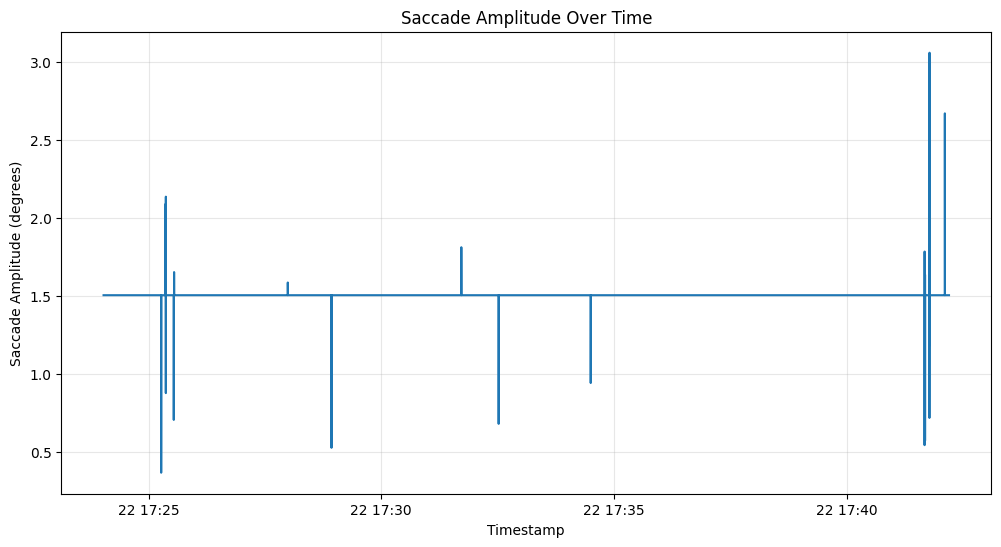

In [71]:

plt.figure(figsize=(12, 6))
sns.lineplot(x='Timestamp', y='Saccade Amplitude', data=iv)
plt.title('Saccade Amplitude Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Saccade Amplitude (degrees)')
plt.grid(alpha=0.3)
# plt.tight_layout()
plt.show()

* Periods of high saccade amplitude (peaks)
➡ These are moments where the participant’s eye made large movements — possibly scanning for targets, switching between stimuli, or being unsure where to look.

* Periods of low saccade amplitude (flat areas)
➡ These are times when eye movements were small → focused attention on one area or careful local inspection.

* Variation across time
➡ The plot shows fluctuations — alternating between searching/exploring (high saccades) and focusing (low saccades).
➡ Could reflect task difficulty, attention shifts, or changes in mental strategy.

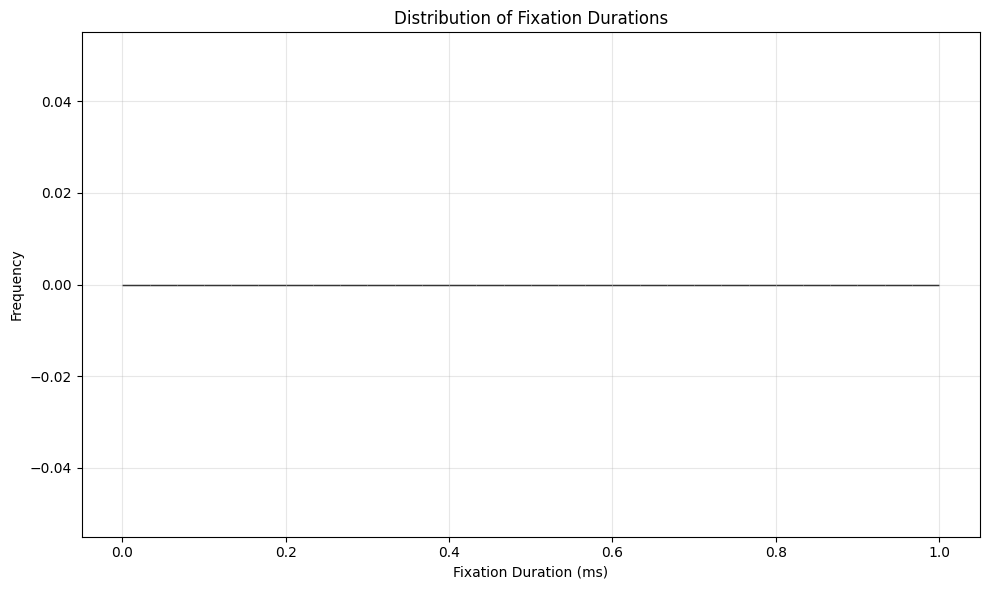

In [72]:
plt.figure(figsize=(10, 6))
sns.histplot(iv['Fixation Duration'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Fixation Durations')
plt.xlabel('Fixation Duration (ms)')
plt.ylabel('Frequency')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


The plot is flat at zero frequency across its X-axis range (0.0 to 1.0 ms). This indicates no data points are present within this extremely narrow range, strongly suggesting an incorrect or too-small X-axis scale for typical fixation durations.









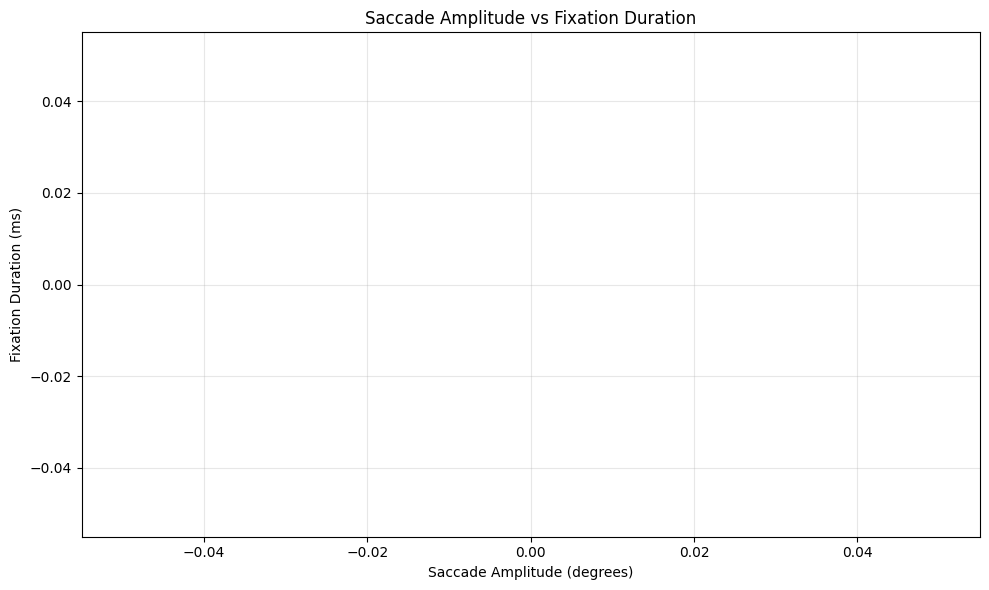

In [73]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Saccade Amplitude', y='Fixation Duration', data=iv, alpha=0.5)
plt.title('Saccade Amplitude vs Fixation Duration')
plt.xlabel('Saccade Amplitude (degrees)')
plt.ylabel('Fixation Duration (ms)')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


The plot, intended to show the relationship between Saccade Amplitude and Fixation Duration, is completely blank. Both X-axis (Saccade Amplitude: -0.04 to 0.04 degrees) and Y-axis (Fixation Duration: -0.04 to 0.04 ms) have extremely narrow and unrealistic ranges for typical eye-tracking data. This strongly suggests that either no data points exist within these minuscule ranges, or more likely, the axis limits are incorrectly set, effectively excluding all actual data.

## **EYE**

In [74]:
ey=pd.read_csv('34_EYE.csv') 
ey.head()

UnixTime  Row QuestionKey                   Timestamp  ET_GazeLeftx  \
0  1.677067e+09    1         NaN  2023-02-22 17:24:02.031996           NaN   
1  1.677067e+09    2         NaN  2023-02-22 17:24:02.038241          -1.0   
2  1.677067e+09    3         NaN  2023-02-22 17:24:02.046576         930.0   
3  1.677067e+09    4         NaN  2023-02-22 17:24:02.054953         973.0   
4  1.677067e+09    5         NaN  2023-02-22 17:24:02.063303          -1.0   

   ET_GazeLefty  ET_GazeRightx  ET_GazeRighty  ET_PupilLeft  ET_PupilRight  \
0           NaN            NaN            NaN           NaN            NaN   
1          -1.0           -1.0           -1.0          -1.0           -1.0   
2         760.0          949.0          899.0          -1.0           -1.0   
3         853.0          953.0          921.0          -1.0           -1.0   
4          -1.0           -1.0           -1.0          -1.0           -1.0   

   ET_TimeSignal  ET_DistanceLeft  ET_DistanceRight  ET_CameraLeftX  \
0            NaN              NaN               NaN             NaN   
1         41.663        -1.000000         -1.000000       -1.000000   
2         49.997       626.816772        617.847900        0.530382   
3         58.375       626.963684        617.868958        0.530440   
4         66.724        -1.000000         -1.000000       -1.000000   

   ET_CameraLeftY  ET_CameraRightX  ET_CameraRightY  ET_ValidityLeft  \
0             NaN              NaN              NaN              NaN   
1       -1.000000        -1.000000        -1.000000              4.0   
2        0.524509         0.374770         0.518336              0.0   
3        0.524443         0.374889         0.518152              0.0   
4       -1.000000        -1.000000        -1.000000              4.0   

   ET_ValidityRight  
0               NaN  
1               4.0  
2               0.0  
3               0.0  
4               4.0

In [75]:
ey.isnull().sum()

UnixTime                0
Row                     0
QuestionKey         45758
Timestamp               0
ET_GazeLeftx            4
ET_GazeLefty            4
ET_GazeRightx           4
ET_GazeRighty           4
ET_PupilLeft            4
ET_PupilRight           4
ET_TimeSignal           4
ET_DistanceLeft         4
ET_DistanceRight        4
ET_CameraLeftX          4
ET_CameraLeftY          4
ET_CameraRightX         4
ET_CameraRightY         4
ET_ValidityLeft         4
ET_ValidityRight        4
dtype: int64

In [76]:
ey.shape

(130813, 19)

In [77]:
ey_cr=ey.select_dtypes(include=['float64','int64'])
ey_corr=ey_cr.corr().round(2)
ey_corr

UnixTime   Row  ET_GazeLeftx  ET_GazeLefty  ET_GazeRightx  \
UnixTime              1.00  1.00         -0.09         -0.08          -0.10   
Row                   1.00  1.00         -0.09         -0.08          -0.10   
ET_GazeLeftx         -0.09 -0.09          1.00          0.78           0.53   
ET_GazeLefty         -0.08 -0.08          0.78          1.00           0.40   
ET_GazeRightx        -0.10 -0.10          0.53          0.40           1.00   
ET_GazeRighty        -0.09 -0.09          0.28          0.43           0.77   
ET_PupilLeft          0.01  0.01          0.02          0.03          -0.01   
ET_PupilRight         0.01  0.01         -0.01         -0.01           0.01   
ET_TimeSignal         1.00  1.00         -0.09         -0.08          -0.10   
ET_DistanceLeft      -0.07 -0.07          0.86          0.90           0.48   
ET_DistanceRight     -0.09 -0.09          0.33          0.40           0.84   
ET_CameraLeftX       -0.06 -0.06          0.86          0.90           0.48   
ET_CameraLeftY       -0.07 -0.07          0.86          0.90           0.48   
ET_CameraRightX      -0.08 -0.08          0.33          0.39           0.84   
ET_CameraRightY      -0.08 -0.08          0.33          0.40           0.84   
ET_ValidityLeft       0.07  0.07         -0.86         -0.90          -0.48   
ET_ValidityRight      0.08  0.08         -0.33         -0.40          -0.84   

                  ET_GazeRighty  ET_PupilLeft  ET_PupilRight  ET_TimeSignal  \
UnixTime                  -0.09          0.01           0.01           1.00   
Row                       -0.09          0.01           0.01           1.00   
ET_GazeLeftx               0.28          0.02          -0.01          -0.09   
ET_GazeLefty               0.43          0.03          -0.01          -0.08   
ET_GazeRightx              0.77         -0.01           0.01          -0.10   
ET_GazeRighty              1.00         -0.00           0.02          -0.09   
ET_PupilLeft              -0.00          1.00           0.26           0.01   
ET_PupilRight              0.02          0.26           1.00           0.01   
ET_TimeSignal             -0.09          0.01           0.01           1.00   
ET_DistanceLeft            0.41          0.02          -0.01          -0.07   
ET_DistanceRight           0.91         -0.01           0.02          -0.09   
ET_CameraLeftX             0.41          0.01          -0.01          -0.06   
ET_CameraLeftY             0.41          0.02          -0.01          -0.07   
ET_CameraRightX            0.90         -0.01           0.02          -0.08   
ET_CameraRightY            0.90         -0.01           0.02          -0.08   
ET_ValidityLeft           -0.41         -0.02           0.01           0.07   
ET_ValidityRight          -0.90          0.01          -0.02           0.08   

                  ET_DistanceLeft  ET_DistanceRight  ET_CameraLeftX  \
UnixTime                    -0.07             -0.09           -0.06   
Row                         -0.07             -0.09           -0.06   
ET_GazeLeftx                 0.86              0.33            0.86   
ET_GazeLefty                 0.90              0.40            0.90   
ET_GazeRightx                0.48              0.84            0.48   
ET_GazeRighty                0.41              0.91            0.41   
ET_PupilLeft                 0.02             -0.01            0.01   
ET_PupilRight               -0.01              0.02           -0.01   
ET_TimeSignal               -0.07             -0.09           -0.06   
ET_DistanceLeft              1.00              0.48            1.00   
ET_DistanceRight             0.48              1.00            0.48   
ET_CameraLeftX               1.00              0.48            1.00   
ET_CameraLeftY               1.00              0.48            1.00   
ET_CameraRightX              0.48              1.00            0.48   
ET_CameraRightY              0.48              1.00            0.48   
ET_ValidityLeft             -1.00   

In [78]:
ey.dtypes

UnixTime            float64
Row                   int64
QuestionKey          object
Timestamp            object
ET_GazeLeftx        float64
ET_GazeLefty        float64
ET_GazeRightx       float64
ET_GazeRighty       float64
ET_PupilLeft        float64
ET_PupilRight       float64
ET_TimeSignal       float64
ET_DistanceLeft     float64
ET_DistanceRight    float64
ET_CameraLeftX      float64
ET_CameraLeftY      float64
ET_CameraRightX     float64
ET_CameraRightY     float64
ET_ValidityLeft     float64
ET_ValidityRight    float64
dtype: object

In [79]:

ey['Timestamp'] = pd.to_datetime(ey['Timestamp'],errors='coerce')


In [80]:
# Identify columns with outliers using IQR
numeric_cols = ey.select_dtypes(include=[np.number]).columns
outlier_cols = []
for col in numeric_cols:
    Q1 = ey[col].quantile(0.25)
    Q3 = ey[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    if ((ey[col] < lower) | (ey[col] > upper)).any():
        outlier_cols.append(col)

In [81]:
for col in ey.columns:
    if ey[col].isnull().any():
        if col in outlier_cols:
            ey[col] = ey[col].fillna(ey[col].median())
        elif ey[col].dtype in ['float64', 'int64']:
            ey[col] = ey[col].fillna(ey[col].mean())
        else:
            ey[col] = ey[col].fillna(ey[col].mode()[0])

In [82]:
ey.isnull().sum()

UnixTime            0
Row                 0
QuestionKey         0
Timestamp           0
ET_GazeLeftx        0
ET_GazeLefty        0
ET_GazeRightx       0
ET_GazeRighty       0
ET_PupilLeft        0
ET_PupilRight       0
ET_TimeSignal       0
ET_DistanceLeft     0
ET_DistanceRight    0
ET_CameraLeftX      0
ET_CameraLeftY      0
ET_CameraRightX     0
ET_CameraRightY     0
ET_ValidityLeft     0
ET_ValidityRight    0
dtype: int64

In [83]:
ey.dtypes

UnixTime                   float64
Row                          int64
QuestionKey                 object
Timestamp           datetime64[ns]
ET_GazeLeftx               float64
ET_GazeLefty               float64
ET_GazeRightx              float64
ET_GazeRighty              float64
ET_PupilLeft               float64
ET_PupilRight              float64
ET_TimeSignal              float64
ET_DistanceLeft            float64
ET_DistanceRight           float64
ET_CameraLeftX             float64
ET_CameraLeftY             float64
ET_CameraRightX            float64
ET_CameraRightY            float64
ET_ValidityLeft            float64
ET_ValidityRight           float64
dtype: object

In [84]:
ey.columns.tolist()

['UnixTime',
 'Row',
 'QuestionKey',
 'Timestamp',
 'ET_GazeLeftx',
 'ET_GazeLefty',
 'ET_GazeRightx',
 'ET_GazeRighty',
 'ET_PupilLeft',
 'ET_PupilRight',
 'ET_TimeSignal',
 'ET_DistanceLeft',
 'ET_DistanceRight',
 'ET_CameraLeftX',
 'ET_CameraLeftY',
 'ET_CameraRightX',
 'ET_CameraRightY',
 'ET_ValidityLeft',
 'ET_ValidityRight']

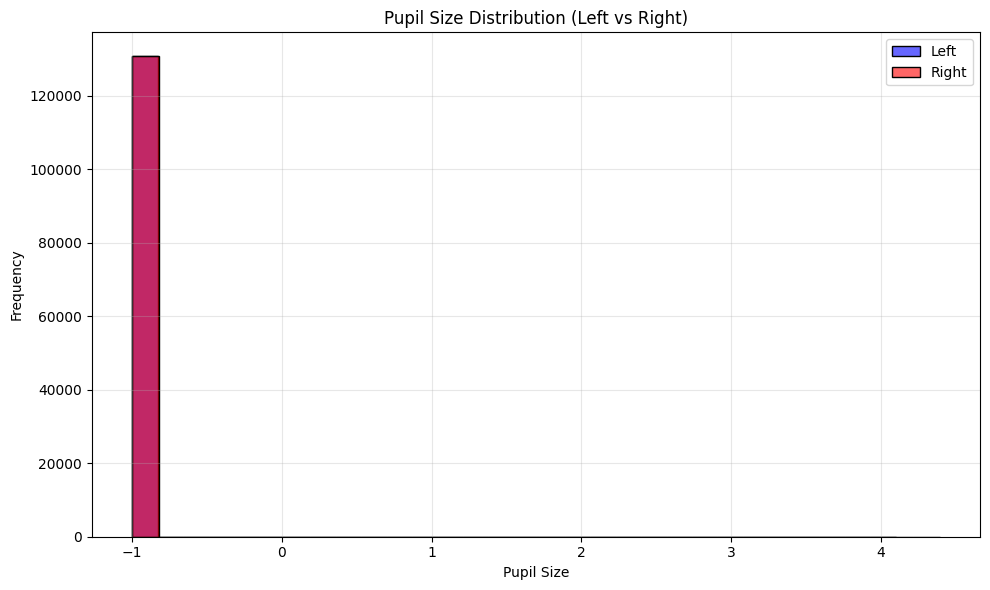

In [85]:
plt.figure(figsize=(10, 6))
sns.histplot(ey['ET_PupilLeft'], bins=30, color='blue', label='Left', alpha=0.6)
sns.histplot(ey['ET_PupilRight'], bins=30, color='red', label='Right', alpha=0.6)
plt.title('Pupil Size Distribution (Left vs Right)')
plt.xlabel('Pupil Size')
plt.ylabel('Frequency')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


- Similar distributions → consistent tracking + lighting.
- Bigger pupil sizes → possibly higher cognitive effort or arousal.


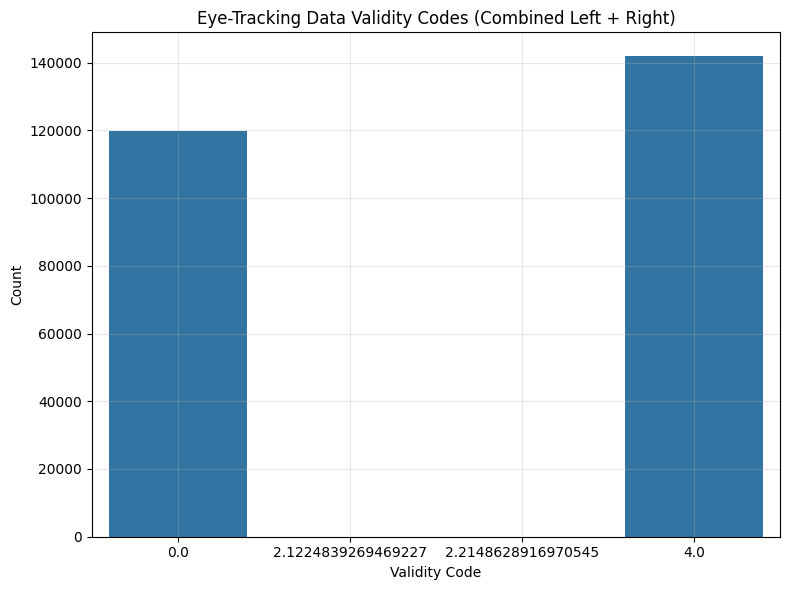

In [86]:
validity = pd.concat([
    ey['ET_ValidityLeft'].rename('Validity').to_frame(),
    ey['ET_ValidityRight'].rename('Validity').to_frame()
])

plt.figure(figsize=(8, 6))
sns.countplot(x='Validity', data=validity)
plt.title('Eye-Tracking Data Validity Codes (Combined Left + Right)')
plt.xlabel('Validity Code')
plt.ylabel('Count')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()




0 = good validity

Higher numbers = reduced data quality

Inference
-Mostly 0s → clean data
-Many 4→ noise, may need filtering

In [87]:
# Clean keys to match
ey['CleanKey'] = ey['QuestionKey'].astype(str).str.replace(r'^\d+', '', regex=True).str.strip().str.lower()
psy['QuestionNumber'] = psy['QuestionNumber'].astype(str).str.strip().str.lower()

# Define strategy in PSY
RT_THRESHOLD = 5
psy['Strategy'] = psy['ResponseTime'].apply(lambda x: 'Holistic' if x < RT_THRESHOLD else 'Piecemeal')

# Merge
ey = ey.merge(
    psy[['QuestionNumber', 'ResponseTime', 'Strategy']],
    left_on='CleanKey',
    right_on='QuestionNumber',
    how='left'
)

# Check merge worked
print(ey[['CleanKey', 'ResponseTime', 'Strategy']].head())


  CleanKey  ResponseTime   Strategy
0    item8         95.91  Piecemeal
1    item8         24.53  Piecemeal
2    item8         13.20  Piecemeal
3    item8         95.91  Piecemeal
4    item8         24.53  Piecemeal


C:\Users\Hp\AppData\Local\Temp\ipykernel_9500\1595222774.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=ey, x='Strategy', y='ET_PupilLeft', inner='quartile', palette='Set2')


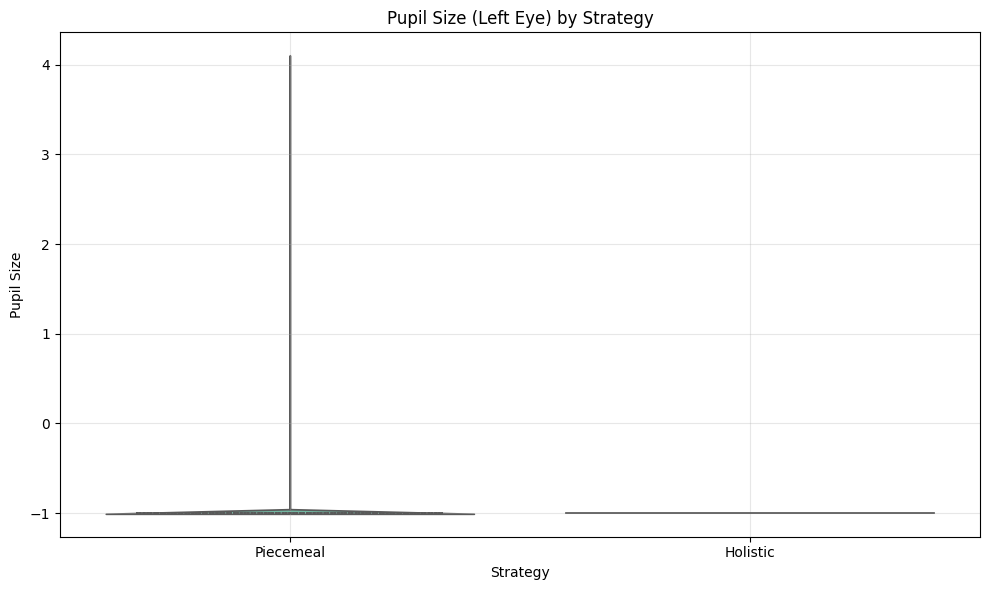

In [88]:


plt.figure(figsize=(10, 6))
sns.violinplot(data=ey, x='Strategy', y='ET_PupilLeft', inner='quartile', palette='Set2')
plt.title('Pupil Size (Left Eye) by Strategy')
plt.xlabel('Strategy')
plt.ylabel('Pupil Size')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


The plot is a violin plot comparing pupil size for "Piecemeal" and "Holistic" strategies. However, both violins are extremely narrow and flat, centered around -1 on the Y-axis, with almost no vertical spread or density shown. This indicates that the dataset likely contains very little or no valid pupil size data within the displayed Y-axis range

## **BlankScreenData**

In [89]:
bd=pd.read_csv('34_BlankScreenData.csv')
bd.head()

UnixTime    Row       Segment                   Timestamp  \
0  1.677067e+09  11567  BlankScreen1  2023-02-22 17:25:38.396901   
1  1.677067e+09  11568  BlankScreen1  2023-02-22 17:25:38.405386   
2  1.677067e+09  11569  BlankScreen1  2023-02-22 17:25:38.413553   
3  1.677067e+09  11570  BlankScreen1  2023-02-22 17:25:38.421926   
4  1.677067e+09  11571  BlankScreen1  2023-02-22 17:25:38.430272   

   ET_GazeLeftx  ET_GazeLefty  ET_GazeRightx  ET_GazeRighty  ET_PupilLeft  \
0         694.0         526.0          685.0          543.0          -1.0   
1          -1.0          -1.0           -1.0           -1.0          -1.0   
2         720.0         534.0          677.0          563.0          -1.0   
3         704.0         528.0          688.0          569.0          -1.0   
4          -1.0          -1.0           -1.0           -1.0          -1.0   

   ET_PupilRight  ET_TimeSignal  ET_DistanceLeft  ET_DistanceRight  \
0           -1.0      96400.323       610.013611        609.664368   
1           -1.0      96408.808        -1.000000         -1.000000   
2           -1.0      96416.974       609.892151        609.499146   
3           -1.0      96425.348       609.862000        609.417480   
4           -1.0      96433.694        -1.000000         -1.000000   

   ET_CameraLeftX  ET_CameraLeftY  ET_CameraRightX  ET_CameraRightY  \
0        0.527974        0.513628         0.369336         0.512632   
1       -1.000000       -1.000000        -1.000000        -1.000000   
2        0.527935        0.513495         0.369363         0.512678   
3        0.528088        0.513561         0.369474         0.512532   
4       -1.000000       -1.000000        -1.000000        -1.000000   

   ET_ValidityLeft  ET_ValidityRight  
0              0.0               0.0  
1              4.0               4.0  
2              0.0               0.0  
3              0.0               0.0  
4              4.0               4.0

In [90]:
bd.dtypes

UnixTime            float64
Row                   int64
Segment              object
Timestamp            object
ET_GazeLeftx        float64
ET_GazeLefty        float64
ET_GazeRightx       float64
ET_GazeRighty       float64
ET_PupilLeft        float64
ET_PupilRight       float64
ET_TimeSignal       float64
ET_DistanceLeft     float64
ET_DistanceRight    float64
ET_CameraLeftX      float64
ET_CameraLeftY      float64
ET_CameraRightX     float64
ET_CameraRightY     float64
ET_ValidityLeft     float64
ET_ValidityRight    float64
dtype: object

In [91]:
bd['Timestamp'] = pd.to_datetime(bd['Timestamp'], errors='coerce')

In [92]:
bd.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5395    False
5396    False
5397    False
5398    False
5399    False
Length: 5400, dtype: bool

In [93]:
bd.isnull().sum()

UnixTime            0
Row                 0
Segment             0
Timestamp           0
ET_GazeLeftx        0
ET_GazeLefty        0
ET_GazeRightx       0
ET_GazeRighty       0
ET_PupilLeft        0
ET_PupilRight       0
ET_TimeSignal       0
ET_DistanceLeft     0
ET_DistanceRight    0
ET_CameraLeftX      0
ET_CameraLeftY      0
ET_CameraRightX     0
ET_CameraRightY     0
ET_ValidityLeft     0
ET_ValidityRight    0
dtype: int64

In [94]:
# Identify columns with outliers using IQR
numeric_cols = bd.select_dtypes(include=[np.number]).columns
outlier_cols = []
for col in numeric_cols:
    Q1 = bd[col].quantile(0.25)
    Q3 = bd[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    if ((bd[col] < lower) | (bd[col] > upper)).any():
        print(outlier_cols.append(col))

In [95]:
bd_cr=bd.select_dtypes(include=['float64','int64'])
bd_corr=bd_cr.corr().round(2)
bd_corr

UnixTime   Row  ET_GazeLeftx  ET_GazeLefty  ET_GazeRightx  \
UnixTime              1.00  1.00         -0.16         -0.21          -0.12   
Row                   1.00  1.00         -0.16         -0.21          -0.12   
ET_GazeLeftx         -0.16 -0.16          1.00          0.94           0.52   
ET_GazeLefty         -0.21 -0.21          0.94          1.00           0.52   
ET_GazeRightx        -0.12 -0.12          0.52          0.52           1.00   
ET_GazeRighty        -0.15 -0.15          0.47          0.54           0.94   
ET_PupilLeft           NaN   NaN           NaN           NaN            NaN   
ET_PupilRight          NaN   NaN           NaN           NaN            NaN   
ET_TimeSignal         1.00  1.00         -0.16         -0.21          -0.12   
ET_DistanceLeft      -0.21 -0.21          0.94          0.98           0.52   
ET_DistanceRight     -0.18 -0.18          0.47          0.55           0.94   
ET_CameraLeftX       -0.20 -0.20          0.94          0.98           0.52   
ET_CameraLeftY       -0.21 -0.21          0.94          0.98           0.52   
ET_CameraRightX      -0.16 -0.16          0.47          0.55           0.94   
ET_CameraRightY      -0.17 -0.17          0.47          0.55           0.94   
ET_ValidityLeft       0.20  0.20         -0.94         -0.98          -0.52   
ET_ValidityRight      0.17  0.17         -0.47         -0.55          -0.94   

                  ET_GazeRighty  ET_PupilLeft  ET_PupilRight  ET_TimeSignal  \
UnixTime                  -0.15           NaN            NaN           1.00   
Row                       -0.15           NaN            NaN           1.00   
ET_GazeLeftx               0.47           NaN            NaN          -0.16   
ET_GazeLefty               0.54           NaN            NaN          -0.21   
ET_GazeRightx              0.94           NaN            NaN          -0.12   
ET_GazeRighty              1.00           NaN            NaN          -0.15   
ET_PupilLeft                NaN           NaN            NaN            NaN   
ET_PupilRight               NaN           NaN            NaN            NaN   
ET_TimeSignal             -0.15           NaN            NaN           1.00   
ET_DistanceLeft            0.54           NaN            NaN          -0.21   
ET_DistanceRight           0.98           NaN            NaN          -0.18   
ET_CameraLeftX             0.54           NaN            NaN          -0.20   
ET_CameraLeftY             0.54           NaN            NaN          -0.21   
ET_CameraRightX            0.98           NaN            NaN          -0.16   
ET_CameraRightY            0.98           NaN            NaN          -0.17   
ET_ValidityLeft           -0.54           NaN            NaN           0.20   
ET_ValidityRight          -0.98           NaN            NaN           0.17   

                  ET_DistanceLeft  ET_DistanceRight  ET_CameraLeftX  \
UnixTime                    -0.21             -0.18           -0.20   
Row                         -0.21             -0.18           -0.20   
ET_GazeLeftx                 0.94              0.47            0.94   
ET_GazeLefty                 0.98              0.55            0.98   
ET_GazeRightx                0.52              0.94            0.52   
ET_GazeRighty                0.54              0.98            0.54   
ET_PupilLeft                  NaN               NaN             NaN   
ET_PupilRight                 NaN               NaN             NaN   
ET_TimeSignal               -0.21             -0.18           -0.20   
ET_DistanceLeft              1.00              0.57            1.00   
ET_DistanceRight             0.57              1.00            0.56   
ET_CameraLeftX               1.00              0.56            1.00   
ET_CameraLeftY               1.00              0.57            1.00   
ET_CameraRightX              0.56              1.00            0.56   
ET_CameraRightY              0.57              1.00            0.56   
ET_ValidityLeft             -1.00   

In [96]:
bd.head()

UnixTime    Row       Segment                  Timestamp  ET_GazeLeftx  \
0  1.677067e+09  11567  BlankScreen1 2023-02-22 17:25:38.396901         694.0   
1  1.677067e+09  11568  BlankScreen1 2023-02-22 17:25:38.405386          -1.0   
2  1.677067e+09  11569  BlankScreen1 2023-02-22 17:25:38.413553         720.0   
3  1.677067e+09  11570  BlankScreen1 2023-02-22 17:25:38.421926         704.0   
4  1.677067e+09  11571  BlankScreen1 2023-02-22 17:25:38.430272          -1.0   

   ET_GazeLefty  ET_GazeRightx  ET_GazeRighty  ET_PupilLeft  ET_PupilRight  \
0         526.0          685.0          543.0          -1.0           -1.0   
1          -1.0           -1.0           -1.0          -1.0           -1.0   
2         534.0          677.0          563.0          -1.0           -1.0   
3         528.0          688.0          569.0          -1.0           -1.0   
4          -1.0           -1.0           -1.0          -1.0           -1.0   

   ET_TimeSignal  ET_DistanceLeft  ET_DistanceRight  ET_CameraLeftX  \
0      96400.323       610.013611        609.664368        0.527974   
1      96408.808        -1.000000         -1.000000       -1.000000   
2      96416.974       609.892151        609.499146        0.527935   
3      96425.348       609.862000        609.417480        0.528088   
4      96433.694        -1.000000         -1.000000       -1.000000   

   ET_CameraLeftY  ET_CameraRightX  ET_CameraRightY  ET_ValidityLeft  \
0        0.513628         0.369336         0.512632              0.0   
1       -1.000000        -1.000000        -1.000000              4.0   
2        0.513495         0.369363         0.512678              0.0   
3        0.513561         0.369474         0.512532              0.0   
4       -1.000000        -1.000000        -1.000000              4.0   

   ET_ValidityRight  
0               0.0  
1               4.0  
2               0.0  
3               0.0  
4               4.0

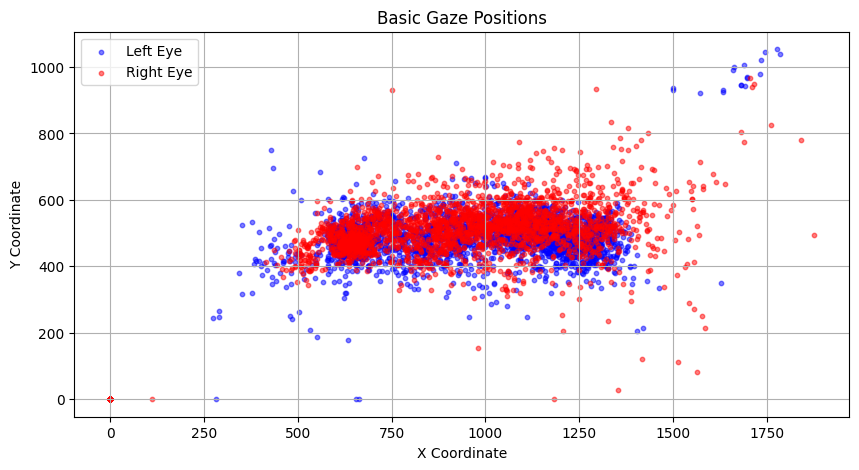

In [97]:
plt.figure(figsize=(10, 5))

# Left eye
plt.scatter(bd['ET_GazeLeftx'], bd['ET_GazeLefty'], 
            alpha=0.5, s=10, label='Left Eye', color='blue')

# Right eye
plt.scatter(bd['ET_GazeRightx'], bd['ET_GazeRighty'], 
            alpha=0.5, s=10, label='Right Eye', color='red')

plt.title('Basic Gaze Positions')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.grid(True)
plt.show()

- Fixation clusters: Dense point clouds show where the eyes lingered (even on a blank screen, this may reveal default gaze patterns)
- Tracking alignment: If red/blue dots overlap well → good binocular tracking. If separated → possible calibration issues
- Data coverage: Gaps indicate missing data (e.g., during blinks)